In [1]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_context('talk')

## What do selected vs unselected genes look like in terms of their expressions across samples in a cell type, across all samples in all cell types (sort), across average expression in all cell types?

Are we going to see that unselected genes are fairly uniform and meaningless? Are they all low expression throughout? Are these methods selecting very high expression genes only?

"Selected" could mean the ones Cibersort includes in expression profiles, or ones flagged by Bindea (probably better)

## Among samples of one cell type: how much variation is there in genes of interest? Is variance motivated?

For selected genes for a certain cell type: how much variance in expression is there within this cell type for these gene?

Is it worth putting variance into our model?

In [3]:
df = pd.read_csv('/microarrays/all_expressions.tsv', sep='\t') # originally from `./curated_data/` directory

In [4]:
del df['Unnamed: 0']

In [5]:
del df['ACCNUM']

In [6]:
del df['Relabel']
del df['DESC']

In [7]:
df.head()

,geneid,probeid,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,RFC2,1053_at,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
1,RFC2,203696_s_at,2858.885,3889.223,2887.030,4171.271,4308.615,3523.738,1085.860,1109.435,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
2,HSPA6,117_at,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
3,HSPA6,213418_at,76.702,85.718,168.155,706.366,463.835,427.057,27.579,119.920,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
4,PAX8,121_at,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,...,26.766424,117.425553,58.012974,31.797787,102.044136,99.058819,147.641189,135.526908,38.741434,157.813189


In [8]:
print('note: some genes have multiple probes')
len(df.geneid.dropna()), len(df.geneid.dropna().unique()), len(df)

note: some genes have multiple probes


(17918, 10977, 17918)

In [9]:
df[df.columns[2:]].head().columns.tolist()

['PRB12534.Jurkat',
 'PRB12535.Jurkat',
 'PRB12536.Jurkat',
 'PRB12537.IM.9',
 'PRB12538.IM.9',
 'PRB12539.IM.9',
 'PRB12540.Raji',
 'PRB12541.Raji',
 'PRB12542.Raji',
 'PRB12543.THP.1',
 'PRB12544.THP.1',
 'PRB12545.THP.1',
 'GSM155229.CEL.gz',
 'GSM155232.CEL.gz',
 'GSM155234.CEL.gz',
 'GSM155236.CEL.gz',
 'GSM155238.CEL.gz',
 'GSM21712.CEL.gz',
 'GSM21713.CEL.gz',
 'GSM21714.CEL.gz',
 'A_LW_DC48hLPS_HC_U133A.CEL',
 'A_LW_DC48hLPS_U133A_200503.CEL',
 'A_LW_DC6hLPS_HC_U133A.CEL',
 'A_LW_DC6hLPS_U133A_200503.CEL',
 'A_LW_imDC_U133A_200503.CEL',
 'A_LW_macro_LPS_HC_U133A.CEL',
 'A_LW_macro_LPS_U133A_130503.CEL',
 'A_LW_macroctrl_U133A_130503.CEL',
 'A_LW_mastcellctrl_U133A.CEL',
 'A_LW_mastcellIgE_U133A.CEL',
 'A_LW_neutrophil_U133A.CEL',
 'A_MF_2hrEosinophils.CEL',
 'A_MF_CCR7._U133A_190202.CEL',
 'A_MF_CCR7._U133A_190202.CEL.1',
 'A_MF_ControlEosinophil.CEL',
 'A_MF_ControlMASTCELL_U133A.CEL',
 'A_MF_IgEMASTCELL_U133A.CEL',
 'A_MF_neutrophils_U133A.CEL',
 'A_MF_TH1human_U133A_290502.C

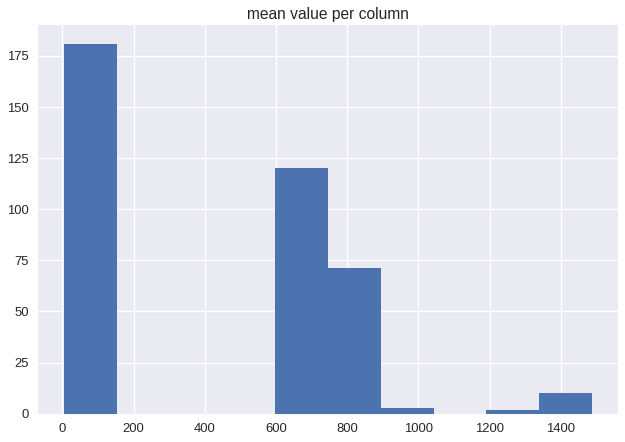

In [10]:
# are columns normalized?
df[df.columns[2:]].apply(lambda x: x.mean(), axis=0).hist()
plt.title('mean value per column')

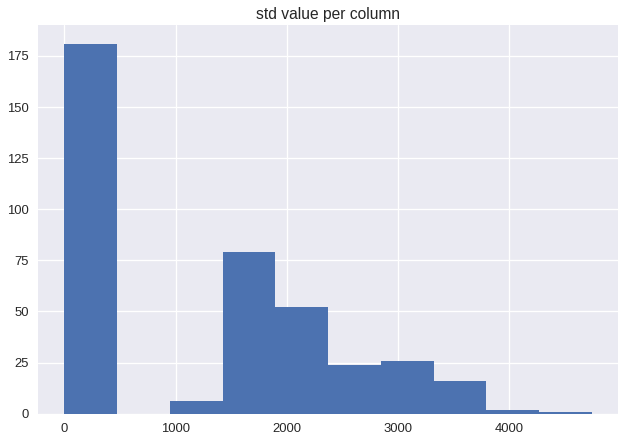

In [11]:
df[df.columns[2:]].apply(lambda x: x.std(), axis=0).hist()
plt.title('std value per column')

In [12]:
meanvals = df[df.columns[2:]].apply(lambda x: x.mean(), axis=0)
meanvals.head()

PRB12534.Jurkat    1294.401286
PRB12535.Jurkat    1313.090414
PRB12536.Jurkat    1344.007331
PRB12537.IM.9      1369.016079
PRB12538.IM.9      1388.609107
dtype: float64

In [13]:
meanvals.sort()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [14]:
meanvals[meanvals > 8]

CD4Tcell-Th1-restimulated12hour-1 [HG-U133A] [IRIS_GSE22886|GSM565276]      643.079902
A_TS_TC_Th1_U133A_141003 [Chtanova_immune|A_TS_TC_Th1_U133A_141003]         655.558908
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]                          659.769247
NKcell-IL15stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565302]                661.455178
CD4Tcell-Th2-restimulated48hour-2 [HG-U133A] [IRIS_GSE22886|GSM565285]      661.543820
DendriticCell-Control-5 [HG-U133A] [IRIS_GSE22886|GSM565370]                668.440631
MemoryTcell-RO-activated-1 [HG-U133A] [IRIS_GSE22886|GSM565290]             668.721397
Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]                          669.947735
MemoryTcell-RO-activated-2 [HG-U133A] [IRIS_GSE22886|GSM565291]             671.585993
Monocyte-Day7-11 [HG-U133A] [IRIS_GSE22886|GSM565364]                       671.884865
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]                          671.961806
NKcell-IL2stimulated-1 [HG-U133A] [IRIS_GSE

looks like several datasets might not be lognormalized

* we ran RMA ourselves on Bindea and IRIS (see `process.R` in those directories)
* abbas, cibersort we took as is

matches this:


In [15]:
# all from this dataset are high
meanvals[meanvals.index.str.contains('Chtanova')]

A_TS_TC_Th1_U133A_141003 [Chtanova_immune|A_TS_TC_Th1_U133A_141003]          655.558908
A_LW_DC48hLPS_U133A_200503 [Chtanova_immune|A_LW_DC48hLPS_U133A_200503]      674.052694
A_TS_TC_Th2_U133A_141003 [Chtanova_immune|A_TS_TC_Th2_U133A_141003]          674.505982
A_TS_RN_gdTcells_U133A [Chtanova_immune|A_TS_RN_gdTcells_U133A]              677.259176
A_LW_DC48hLPS_HC_U133A [Chtanova_immune|A_LW_DC48hLPS_HC_U133A]              677.461544
A_LW_imDC_U133A_200503 [Chtanova_immune|A_LW_imDC_U133A_200503]              685.552698
A_SZ_mac2cont_U133A_240603 [Chtanova_immune|A_SZ_mac2cont_U133A_240603]      688.127877
A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303]              691.869523
A_MF_IgEMASTCELL_U133A [Chtanova_immune|A_MF_IgEMASTCELL_U133A]              692.751444
A_LW_macroctrl_U133A_130503 [Chtanova_immune|A_LW_macroctrl_U133A_130503]    696.958173
A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303]              698.460943
A_TS_RN_gdTcellsREP_A [Chtanova_

In [16]:
# all from this dataset are high
meanvals[meanvals.index.str.contains('IRIS')]

CD4Tcell-Th1-restimulated12hour-1 [HG-U133A] [IRIS_GSE22886|GSM565276]    643.079902
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]                        659.769247
NKcell-IL15stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565302]              661.455178
CD4Tcell-Th2-restimulated48hour-2 [HG-U133A] [IRIS_GSE22886|GSM565285]    661.543820
DendriticCell-Control-5 [HG-U133A] [IRIS_GSE22886|GSM565370]              668.440631
MemoryTcell-RO-activated-1 [HG-U133A] [IRIS_GSE22886|GSM565290]           668.721397
Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]                        669.947735
MemoryTcell-RO-activated-2 [HG-U133A] [IRIS_GSE22886|GSM565291]           671.585993
Monocyte-Day7-11 [HG-U133A] [IRIS_GSE22886|GSM565364]                     671.884865
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]                        671.961806
NKcell-IL2stimulated-1 [HG-U133A] [IRIS_GSE22886|GSM565297]               673.503396
DendriticCell-Control-2 [HG-U133A] [IRIS_GSE22886|GSM565367]     

In [17]:
df[meanvals[meanvals > 8].index[0]].apply(np.log2).mean()

7.6590038088088788

In [18]:
for c in meanvals[meanvals > 8].index:
    df[c] = df[c].apply(np.log2)

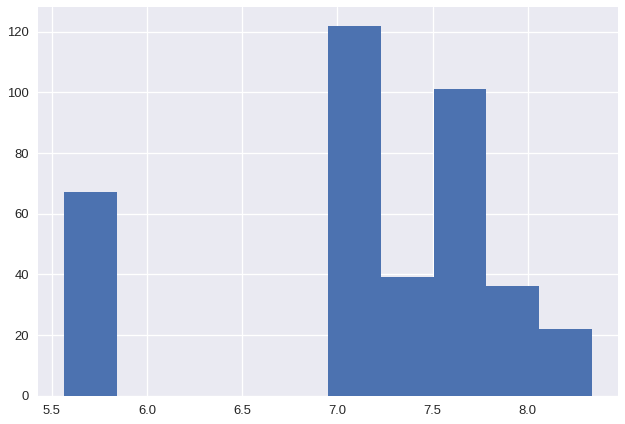

In [19]:
df[df.columns[2:]].apply(lambda x: x.mean(), axis=0).hist()

In [21]:
bindea = pd.read_csv('../data_engineering/bindea_by_category.csv')
bindea.head()

,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,...,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
0,207819_s_at,204677_at,218405_at,209870_s_at,206407_s_at,205566_at,206742_at,203381_s_at,203196_at,215908_at,...,221333_at,203747_at,212609_s_at,205103_at,213419_at,208402_at,213245_at,207533_at,209735_at,206148_at
1,221234_s_at,NaN,217729_s_at,221087_s_at,207900_at,49452_at,204879_at,218673_s_at,206281_at,215409_at,...,221334_s_at,216197_at,210109_at,207840_at,40148_at,216876_s_at,220841_s_at,219424_at,202201_at,NaN
2,219497_s_at,NaN,209871_s_at,214450_at,207861_at,43427_at,209946_at,214452_at,205428_s_at,204014_at,...,NaN,208442_s_at,206978_at,203562_at,201525_at,205707_at,220842_at,210029_at,220162_s_at,NaN
3,210347_s_at,NaN,219168_s_at,204794_at,207277_at,221928_at,NaN,214390_s_at,206676_at,204015_s_at,...,NaN,210858_x_at,207794_at,211144_x_at,212062_at,206419_at,221569_at,205569_at,210325_at,NaN
4,206255_at,NaN,64432_at,37145_at,205404_at,222195_s_at,NaN,208075_s_at,214533_at,205906_at,...,NaN,207686_s_at,208719_s_at,216920_s_at,201641_at,NaN,214373_at,218400_at,206749_at,NaN


In [22]:
# matching by probeid alone is bad -- look how few hits we get
print(df[df['probeid'].isin(bindea['CD8 T cells'].dropna().unique())].shape)

(36, 389)


In [24]:
# match by gene ids instead
# see extractHumanAnnotations.R
annotations = pd.read_csv('../data_engineering/annot.tsv', sep='\t')
annotations = annotations.reset_index()
annotations.columns = ['probe', 'accession', 'symbol', 'desc']
annotations.head()

,probe,accession,symbol,desc
0,1007_s_at,U48705,NaN,NaN
1,1053_at,M87338,RFC2,"replication factor C (activator 1) 2, 40kDa"
2,117_at,X51757,HSPA6,heat shock 70kDa protein 6 (HSP70B')
3,121_at,X69699,PAX8,paired box 8
4,1255_g_at,L36861,GUCA1A,guanylate cyclase activator 1A (retina)


In [25]:
cd8_t = pd.DataFrame({'probe': bindea['CD8 T cells'].dropna().unique()})
print(cd8_t.shape)
cd8_t.head()


(40, 1)


,probe
0,218405_at
1,217729_s_at
2,209871_s_at
3,219168_s_at
4,64432_at


In [26]:
cd8_t = pd.merge(cd8_t, annotations, how='left', on='probe')
print(cd8_t.shape)
cd8_t.head()

(40, 4)


,probe,accession,symbol,desc
0,218405_at,NM_013375,ABT1,activator of basal transcription 1
1,217729_s_at,NM_001130,AES,amino-terminal enhancer of split
2,209871_s_at,AB014719,APBA2,"amyloid beta (A4) precursor protein-binding, f..."
3,219168_s_at,NM_017701,PRR5,proline rich 5 (renal)
4,64432_at,W05463,MAPKAPK5-AS1,MAPKAPK5 antisense RNA 1


In [27]:
matching = df[df['geneid'].isin(cd8_t.symbol.dropna().unique())].copy()
print(matching.shape)
del matching['probeid']
matching = matching.set_index('geneid')
matching.head()

(58, 389)


,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,PRB12542.Raji,PRB12543.THP.1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
geneid,,,,,,,,,,,,,,,,,,,,,
DNAJB1,11.034424,11.090129,11.376662,9.950614,10.672197,10.600500,10.229173,10.224464,10.523462,11.116644,...,12.064604,11.621663,12.088633,11.953618,12.001804,11.906028,10.498152,11.623152,10.205954,10.630752
DNAJB1,11.925376,12.195360,12.127385,10.801230,11.545830,11.451978,11.070445,10.934070,11.419696,11.724382,...,12.064604,11.621663,12.088633,11.953618,12.001804,11.906028,10.498152,11.623152,10.205954,10.630752
SRSF7,10.838427,11.113841,10.967272,11.556311,11.575781,11.495087,11.655224,11.524059,11.720500,11.561961,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039
SRSF7,8.443913,8.076548,8.279555,8.565742,8.550681,8.188065,7.660645,8.338202,8.336404,8.222587,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039
SRSF7,10.046266,10.109718,9.832681,10.410356,11.008591,10.908534,10.932883,10.296714,10.807213,9.764019,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039


In [28]:
print(matching.columns.tolist())

['PRB12534.Jurkat', 'PRB12535.Jurkat', 'PRB12536.Jurkat', 'PRB12537.IM.9', 'PRB12538.IM.9', 'PRB12539.IM.9', 'PRB12540.Raji', 'PRB12541.Raji', 'PRB12542.Raji', 'PRB12543.THP.1', 'PRB12544.THP.1', 'PRB12545.THP.1', 'GSM155229.CEL.gz', 'GSM155232.CEL.gz', 'GSM155234.CEL.gz', 'GSM155236.CEL.gz', 'GSM155238.CEL.gz', 'GSM21712.CEL.gz', 'GSM21713.CEL.gz', 'GSM21714.CEL.gz', 'A_LW_DC48hLPS_HC_U133A.CEL', 'A_LW_DC48hLPS_U133A_200503.CEL', 'A_LW_DC6hLPS_HC_U133A.CEL', 'A_LW_DC6hLPS_U133A_200503.CEL', 'A_LW_imDC_U133A_200503.CEL', 'A_LW_macro_LPS_HC_U133A.CEL', 'A_LW_macro_LPS_U133A_130503.CEL', 'A_LW_macroctrl_U133A_130503.CEL', 'A_LW_mastcellctrl_U133A.CEL', 'A_LW_mastcellIgE_U133A.CEL', 'A_LW_neutrophil_U133A.CEL', 'A_MF_2hrEosinophils.CEL', 'A_MF_CCR7._U133A_190202.CEL', 'A_MF_CCR7._U133A_190202.CEL.1', 'A_MF_ControlEosinophil.CEL', 'A_MF_ControlMASTCELL_U133A.CEL', 'A_MF_IgEMASTCELL_U133A.CEL', 'A_MF_neutrophils_U133A.CEL', 'A_MF_TH1human_U133A_290502.CEL', 'A_MF_TH2human_U133A_290502.CEL',

In [29]:
# we are going to rename the columns so we can work with them
column_mappings = {}

In [30]:
# load column descriptions
cols_1 = pd.read_csv('../curated_data/pure_samples/iris/GSE22886_descriptions_parsed.tsv', sep='\t')
cols_1.head(), cols_1.tail()

(    filename      type subtype  replicate
 0  GSM565269  CD8Tcell      N0          1
 1  GSM565270  CD8Tcell      N0          2
 2  GSM565271  CD8Tcell      N0          3
 3  GSM565272  CD8Tcell      N0          4
 4  GSM565273  CD4Tcell      N0          1,
       filename        type  subtype  replicate
 109  GSM565378  Neutrophil  Resting          1
 110  GSM565379  Neutrophil  Resting          2
 111  GSM565380  Neutrophil  Resting          3
 112  GSM565381  Neutrophil  Resting          4
 113  GSM565382  Neutrophil  Resting          5)

In [31]:
cols_1['newname'] = cols_1['type'] + ' | ' + cols_1['subtype'] + ' | ' + cols_1['replicate'].astype(str)
cols_1.newname.head()

0    CD8Tcell | N0 | 1
1    CD8Tcell | N0 | 2
2    CD8Tcell | N0 | 3
3    CD8Tcell | N0 | 4
4    CD4Tcell | N0 | 1
Name: newname, dtype: object

In [32]:
for _,row in cols_1.iterrows():
    column_mappings[row['filename']+'.CEL.gz'] = row['newname']

In [33]:
column_mappings

{'GSM565269.CEL.gz': 'CD8Tcell | N0 | 1',
 'GSM565270.CEL.gz': 'CD8Tcell | N0 | 2',
 'GSM565271.CEL.gz': 'CD8Tcell | N0 | 3',
 'GSM565272.CEL.gz': 'CD8Tcell | N0 | 4',
 'GSM565273.CEL.gz': 'CD4Tcell | N0 | 1',
 'GSM565274.CEL.gz': 'CD4Tcell | N0 | 2',
 'GSM565275.CEL.gz': 'CD4Tcell | N0 | 3',
 'GSM565276.CEL.gz': 'CD4Tcell | Th1-restimulated12hour | 1',
 'GSM565277.CEL.gz': 'CD4Tcell | Th1-restimulated12hour | 2',
 'GSM565278.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 1',
 'GSM565279.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 2',
 'GSM565280.CEL.gz': 'CD4Tcell | Th1-restimulated48hour | 3',
 'GSM565281.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 1',
 'GSM565282.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 2',
 'GSM565283.CEL.gz': 'CD4Tcell | Th2-restimulated12hour | 3',
 'GSM565284.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 1',
 'GSM565285.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 2',
 'GSM565286.CEL.gz': 'CD4Tcell | Th2-restimulated48hour | 3',
 'GSM565287.CEL.gz': 'Me

In [34]:
cols_2 = pd.read_csv('../curated_data/pure_samples/bindea/cell_type_in_each_sample.tsv', sep='\t')
cols_2.head()

,Unnamed: 0,type,subtype,filename,filename_low
0,2,dendritic,6hr LPS,A_LW_DC6hLPS_U133A_200503.CEL,a_lw_dc6hlps_u133a_200503.cel
1,6,dendritic,6hr LPS,A_SZ_6hLPSDC2_U133A_250603.CEL,a_sz_6hlpsdc2_u133a_250603.cel
2,10,dendritic,48hr LPS,A_LW_DC48hLPS_U133A_200503.CEL,a_lw_dc48hlps_u133a_200503.cel
3,14,dendritic,48hr LPS,A_SZ_48hLPSDC2_U133A_250603.CEL,a_sz_48hlpsdc2_u133a_250603.cel
4,17,dendritic,6hr LPS + HC,A_LW_DC6hLPS_HC_U133A.CEL,a_lw_dc6hlps_hc_u133a.cel


In [35]:
for (typ,subtype), grp in cols_2.groupby(['type','subtype']):
    # add replication number
    grp['newname'] = list(range(len(grp)))
    grp['newname'] = grp['type'] + ' | ' + grp['subtype'] + ' | ' + grp['newname'].astype(str)
    for _, row in grp.iterrows():
        column_mappings[row['filename']] = row['newname']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
cols_3 = pd.read_csv('../curated_data/pure_samples/abbas/classes.tsv', sep='\t', header=None)
cols_3[0] = cols_3[0].str.replace('-', '.')
cols_3.head()

,0,1
0,Jurkat,Tcell
1,IM.9,Bcell
2,Raji,Bcell
3,THP.1,monocyte


In [38]:
for _,row in cols_3.iterrows():
    selected = matching.columns[matching.columns.str.contains(row[0])]
    print(selected)
    for ix, c in enumerate(selected):
        column_mappings[c] = row[1] + ' %d' % (ix+1)

Index(['PRB12534.Jurkat', 'PRB12535.Jurkat', 'PRB12536.Jurkat'], dtype='object')
Index(['PRB12537.IM.9', 'PRB12538.IM.9', 'PRB12539.IM.9'], dtype='object')
Index(['PRB12540.Raji', 'PRB12541.Raji', 'PRB12542.Raji'], dtype='object')
Index(['PRB12543.THP.1', 'PRB12544.THP.1', 'PRB12545.THP.1'], dtype='object')


In [39]:
cols_4 = pd.read_csv('../curated_data/pure_samples/cibersort/LM22-classes.txt', sep='\t', header=None)
cols_4_orig = pd.read_csv('../curated_data/pure_samples/cibersort/LM22-ref-sample.txt', sep='\t').columns
print(cols_4_orig)
cols_4.head()

Index(['Relabel',
       'A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303]',
       'A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303]',
       'A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303]',
       'A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303]',
       'A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603]',
       'A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102]',
       'A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603]',
       'A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102]',
       'A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304]',
       ...
       'TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1]',
       'TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2]',
       'TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3]',
       'TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1]',
       'TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2]',
       'TN_U133A_3 [TFH_E-MEXP-750|T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,B cells naive,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
1,B cells memory,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
2,Plasma cells,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
3,T cells CD8,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
4,T cells CD4 naive,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,2,0,2


In [40]:
for _,row in cols_4.iterrows():
    # print row[row==1].index
    print(row[0])
    #print cols_4_orig[row[row==1].index]
    for ix, s in enumerate(cols_4_orig[row[row==1].index]):
        column_mappings[s] = row[0] + "_%d" % (ix+1)
    #break

B cells naive
B cells memory
Plasma cells
T cells CD8
T cells CD4 naive
T cells CD4 memory resting
T cells CD4 memory activated
T cells follicular helper
T cells gamma delta
T cells regulatory (Tregs)
NK cells resting
NK cells activated
Monocytes
Macrophages M0
Macrophages M1
Macrophages M2
Dendritic cells resting
Dendritic cells activated
Mast cells resting
Mast cells activated
Eosinophils
Neutrophils


In [41]:
column_mappings

{'A_LW_DC48hLPS_HC_U133A.CEL': 'dendritic | 48hr LPS + HC | 0',
 'A_LW_DC48hLPS_U133A_200503.CEL': 'dendritic | 48hr LPS | 0',
 'A_LW_DC6hLPS_HC_U133A.CEL': 'dendritic | 6hr LPS + HC | 0',
 'A_LW_DC6hLPS_U133A_200503.CEL': 'dendritic | 6hr LPS | 0',
 'A_LW_imDC_U133A_200503.CEL': 'dendritic | Immature | 0',
 'A_LW_macro_LPS_HC_U133A.CEL': 'macrophage | LPS + HC | 0',
 'A_LW_macro_LPS_U133A_130503.CEL': 'macrophage | LPS | 0',
 'A_LW_macroctrl_U133A_130503.CEL': 'macrophage | contorl | 0',
 'A_LW_mastcellIgE_U133A [Chtanova_immune|A_LW_mastcellIgE_U133A]': 'Mast cells activated_1',
 'A_LW_mastcellIgE_U133A.CEL': 'Mastcell | IgE | 1',
 'A_LW_mastcellctrl_U133A [Chtanova_immune|A_LW_mastcellctrl_U133A]': 'Mast cells resting_1',
 'A_LW_mastcellctrl_U133A.CEL': 'Mastcell | Contrl | 1',
 'A_LW_neutrophil_U133A [Chtanova_immune|A_LW_neutrophil_U133A]': 'Neutrophils_1',
 'A_LW_neutrophil_U133A.CEL': 'neutrophils | Contrl | 1',
 'A_MF_2hrEosinophils.CEL': 'eosinophils | PMA | 0',
 'A_MF_2hrEosi

In [42]:
len(column_mappings)

303

In [44]:
# save this out
import pickle
if False:
    with open('column_mappings.pkl', 'wb') as f:
        pickle.dump(column_mappings, f, pickle.HIGHEST_PROTOCOL)
else:
    print("didn't pickle this time")

didn't pickle this time


In [45]:
len(matching.columns)

387

In [46]:
matching = matching.rename(columns=lambda x: column_mappings[x] if x in column_mappings else x)
matching.head()

,Tcell 1,Tcell 2,Tcell 3,Bcell 1,Bcell 2,Bcell 3,Bcell 1,Bcell 2,Bcell 3,monocyte 1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],T cells CD4 naive_1,T cells CD4 naive_2,T cells CD4 naive_3,TH_1 [TREGs_GSE4527|GSM101518],T cells regulatory (Tregs)_1,TH_2 [TREGs_GSE4527|GSM101520],T cells regulatory (Tregs)_2
geneid,,,,,,,,,,,,,,,,,,,,,
DNAJB1,11.034424,11.090129,11.376662,9.950614,10.672197,10.600500,10.229173,10.224464,10.523462,11.116644,...,12.064604,11.621663,12.088633,11.953618,12.001804,11.906028,10.498152,11.623152,10.205954,10.630752
DNAJB1,11.925376,12.195360,12.127385,10.801230,11.545830,11.451978,11.070445,10.934070,11.419696,11.724382,...,12.064604,11.621663,12.088633,11.953618,12.001804,11.906028,10.498152,11.623152,10.205954,10.630752
SRSF7,10.838427,11.113841,10.967272,11.556311,11.575781,11.495087,11.655224,11.524059,11.720500,11.561961,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039
SRSF7,8.443913,8.076548,8.279555,8.565742,8.550681,8.188065,7.660645,8.338202,8.336404,8.222587,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039
SRSF7,10.046266,10.109718,9.832681,10.410356,11.008591,10.908534,10.932883,10.296714,10.807213,9.764019,...,10.465264,10.992775,10.944009,10.125404,10.859161,10.579804,9.993588,9.031038,9.818260,9.881039


### look at variance for a small population: CD8 T cells

In [47]:
T_cell_cols = matching.columns[matching.columns.str.contains('CD8')]
T_cell_cols

Index(['Tcell | CD8 | 0', 'Tcell | CD8 | 1', 'Tcell | CD8 | 2',
       'Tcell | CD8 | 3', 'Tcell | CD8 | 4', 'CD8Tcell | N0 | 1',
       'CD8Tcell | N0 | 2', 'CD8Tcell | N0 | 3', 'CD8Tcell | N0 | 4',
       'T cells CD8_1', 'T cells CD8_2', 'T cells CD8_3', 'T cells CD8_4'],
      dtype='object')

0.84394021358913329

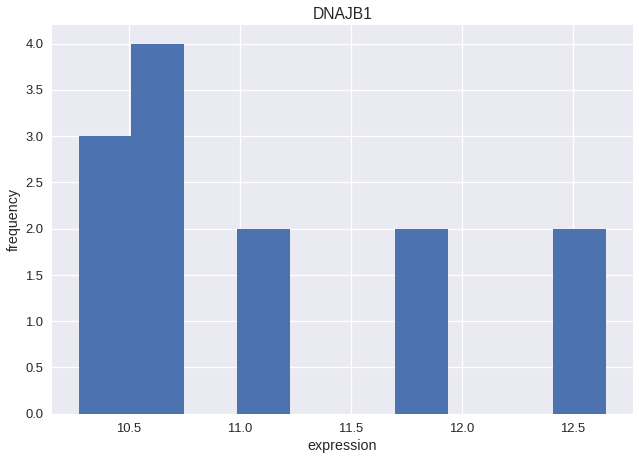

In [48]:
matching[T_cell_cols].iloc[0].hist()
plt.title(matching[T_cell_cols].iloc[0].name)
plt.xlabel('expression')
plt.ylabel('frequency')
matching[T_cell_cols].iloc[0].std()

In [49]:
stds = matching[T_cell_cols].apply(lambda row: row.std(), axis=1)

In [50]:
stds

geneid
DNAJB1      0.843940
DNAJB1      0.736018
SRSF7       1.315281
SRSF7       2.313272
SRSF7       0.346112
SRSF7       0.380234
ZFP36L2     1.410612
ZFP36L2     0.523371
ZFP36L2     0.899453
VAMP2       1.963299
VAMP2       0.738008
VAMP2       1.944193
PPP1R2      1.166575
PPP1R2      1.209910
PPP1R2      2.745860
TBCC        0.901813
LEPROTL1    1.248145
LEPROTL1    0.508795
CAMLG       0.912297
KLF9        1.754057
KLF9        0.506187
KLF9        1.297623
GADD45A     1.162970
TMC6        0.603973
TMC6        1.203266
CD8A        0.730108
ZNF91       1.147483
PF4         1.659916
THUMPD1     1.091710
THUMPD1     1.531107
FLT3LG      1.334180
FLT3LG      1.437797
TSC22D3     1.922244
TSC22D3     0.371543
SLC16A7     0.907211
SLC16A7     1.678197
GZMM        1.117000
CD8B        0.788709
CD8B        1.549705
SF1         0.618064
SF1         1.758411
RBM3        1.008376
RBM3        2.421020
APBA2       1.052979
APBA2       1.309749
HAUS3       0.710759
ZNF609      0.969281
ZNF609

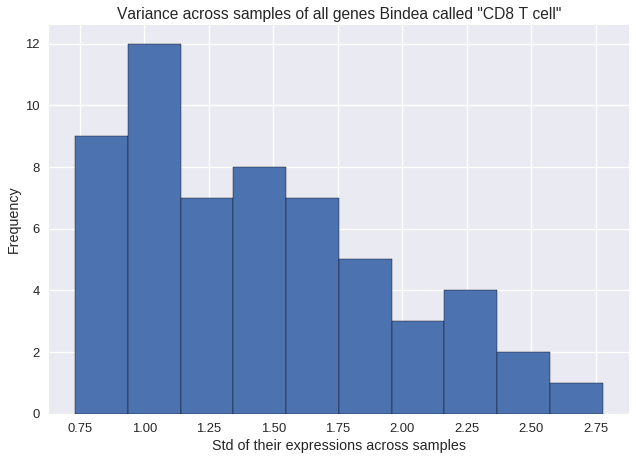

In [56]:
stds.hist(edgecolor="k")
plt.title('Variance across samples of all genes Bindea called "CD8 T cell"')
plt.xlabel('Std of their expressions across samples')
plt.ylabel('Frequency')
plt.savefig('plots/variance_cd8tcells.png', dpi=300)

### larger population: all types of T cells

WRONG -- we did not properly update `matching`

In [52]:
# isolate only the T cells
T_cell_cols = matching.columns[matching.columns.str.replace('Tcell', 'T cell').str.contains('T cell')]
T_cell_cols

Index(['Tcell 1', 'Tcell 2', 'Tcell 3', 'Tcell | CD8 | 0', 'Tcell | CD8 | 1',
       'Tcell | CD8 | 2', 'Tcell | CD8 | 3', 'Tcell | CD8 | 4',
       'Tcell | Th1 | 0', 'Tcell | Th2 | 0', 'Tcell | Th1 | 1',
       'Tcell | Th2 | 1', 'CD8Tcell | N0 | 1', 'CD8Tcell | N0 | 2',
       'CD8Tcell | N0 | 3', 'CD8Tcell | N0 | 4', 'CD4Tcell | N0 | 1',
       'CD4Tcell | N0 | 2', 'CD4Tcell | N0 | 3',
       'CD4Tcell | Th1-restimulated12hour | 1',
       'CD4Tcell | Th1-restimulated12hour | 2',
       'CD4Tcell | Th1-restimulated48hour | 1',
       'CD4Tcell | Th1-restimulated48hour | 2',
       'CD4Tcell | Th1-restimulated48hour | 3',
       'CD4Tcell | Th2-restimulated12hour | 1',
       'CD4Tcell | Th2-restimulated12hour | 2',
       'CD4Tcell | Th2-restimulated12hour | 3',
       'CD4Tcell | Th2-restimulated48hour | 1',
       'CD4Tcell | Th2-restimulated48hour | 2',
       'CD4Tcell | Th2-restimulated48hour | 3',
       'MemoryTcell | RO-unactivated | 1', 'MemoryTcell | RO-unactivated | 2',


In [53]:
stds = matching[T_cell_cols].apply(lambda row: row.std(), axis=1)

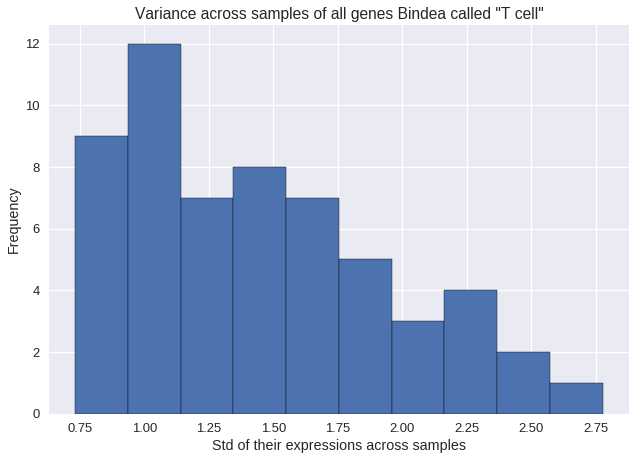

In [55]:
stds.hist(edgecolor="k")
plt.title('Variance across samples of all genes Bindea called "T cell"')
plt.xlabel('Std of their expressions across samples')
plt.ylabel('Frequency')
plt.savefig('plots/variance_tcells.png', dpi=300)

# Where does Cibersort's point estimate lie?

For a particular gene, plot its distribution of expressions, then overlay the one expression chosen by Cibersort.

Let's look at CD8 T cells again.

In [57]:
lm22 = pd.read_csv('LM22.txt', sep='\t')
lm22.head()

,Gene symbol,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,ABCB4,555.713449,10.744235,7.225819,4.311280,4.605860,7.406442,8.043976,6.469993,7.833082,...,6.202496,7.951360,27.557710,121.432277,114.636747,4.872184,4.727985,34.113659,15.030530,14.906888
1,ABCB9,15.603544,22.094787,653.392328,24.223723,35.671507,30.048192,38.455423,17.604795,46.073657,...,20.309426,56.251887,29.380878,40.390260,123.993305,23.384603,53.466757,23.615746,29.786442,33.679147
2,ACAP1,215.305951,321.621021,38.616872,1055.613378,1790.097170,922.152747,340.883424,1107.798265,1995.482601,...,190.879024,48.972217,30.974254,23.055150,61.386550,26.412923,104.200198,73.607932,696.442802,596.025961
3,ACHE,15.117949,16.648847,22.123737,13.428288,27.187732,18.444927,13.441268,14.805542,24.652712,...,16.375268,13.692963,1373.069620,48.585761,16.715474,193.159977,13.948778,20.501249,40.414927,22.766494
4,ACP5,605.897384,1935.201479,1120.104684,306.312519,744.656599,557.819820,248.546932,711.949744,958.916018,...,512.931382,13644.172300,1062.475909,7633.960182,13825.053630,3989.865169,263.497930,323.381277,860.563374,307.142798


In [58]:
matching2 = matching[matching.index.isin(lm22['Gene symbol'].unique())]
matching.shape, matching2.shape

((58, 387), (11, 387))

In [59]:
T_cell_cols = matching.columns[matching.columns.str.contains('CD8')]
T_cell_cols

Index(['Tcell | CD8 | 0', 'Tcell | CD8 | 1', 'Tcell | CD8 | 2',
       'Tcell | CD8 | 3', 'Tcell | CD8 | 4', 'CD8Tcell | N0 | 1',
       'CD8Tcell | N0 | 2', 'CD8Tcell | N0 | 3', 'CD8Tcell | N0 | 4',
       'T cells CD8_1', 'T cells CD8_2', 'T cells CD8_3', 'T cells CD8_4'],
      dtype='object')

std:  1.41061215548
cib expression value:  11.6563504589


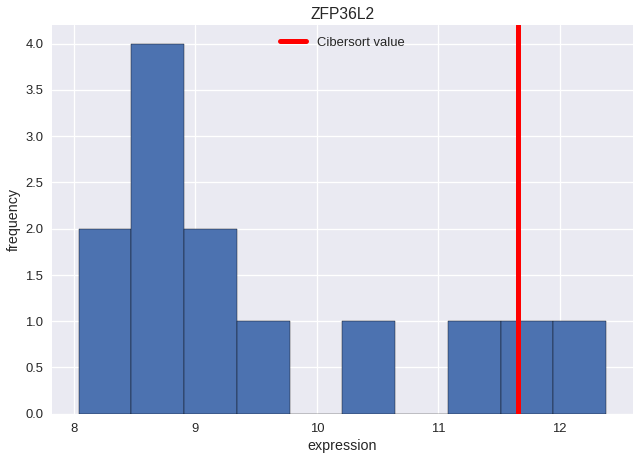

In [61]:
matching2[T_cell_cols].iloc[0].hist(edgecolor="k")
plt.title(matching2[T_cell_cols].iloc[0].name)
plt.xlabel('expression')
plt.ylabel('frequency')
print('std: ', matching2[T_cell_cols].iloc[0].std())

print('cib expression value: ', end=' ')
cibval = np.log2(lm22[lm22['Gene symbol']==matching2[T_cell_cols].iloc[0].name]['T cells CD8'].iloc[0])
print(cibval)
plt.axvline(x=cibval, lw=5, label='Cibersort value', c='r')
plt.legend(loc='best')

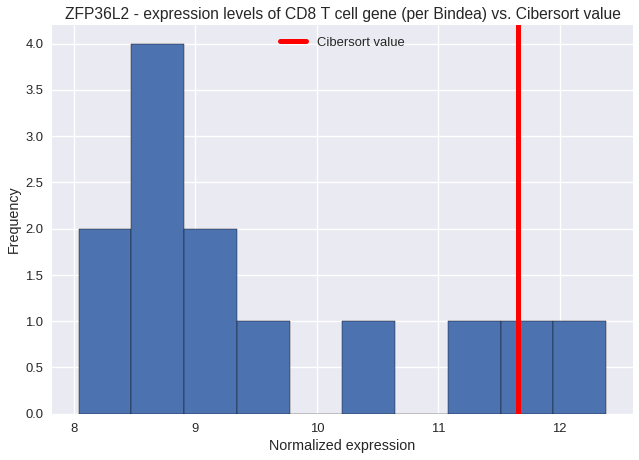

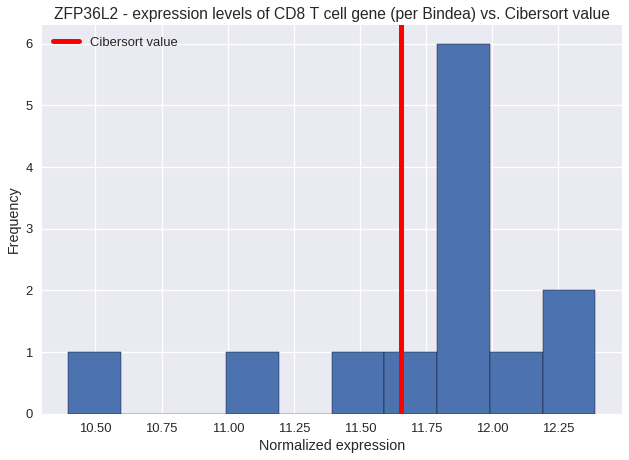

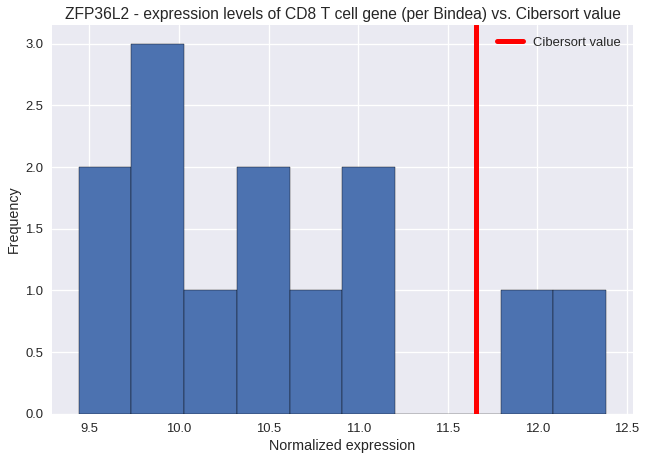

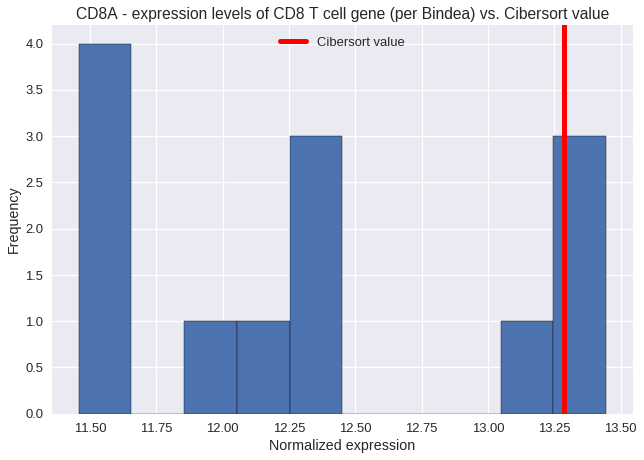

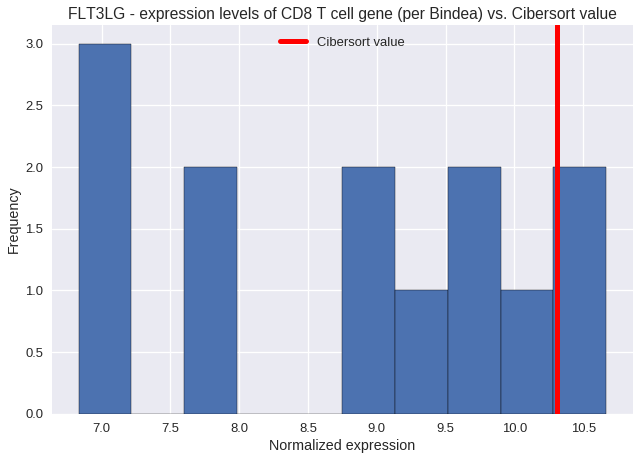

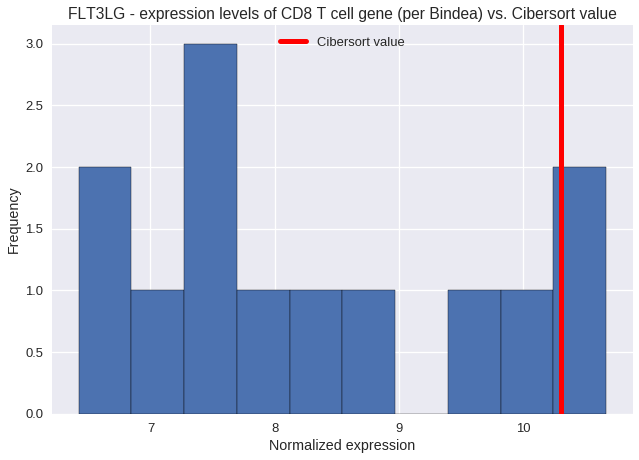

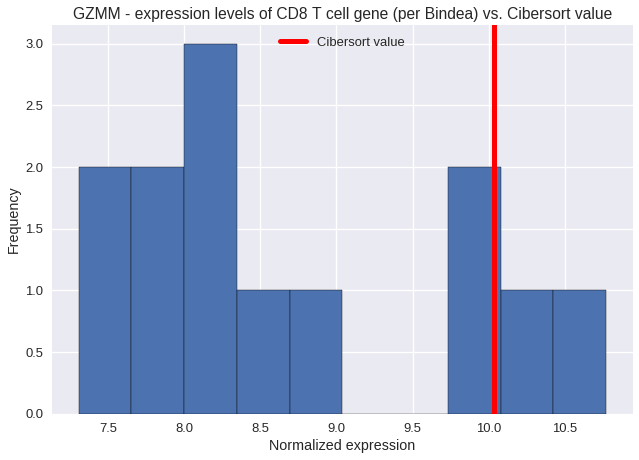

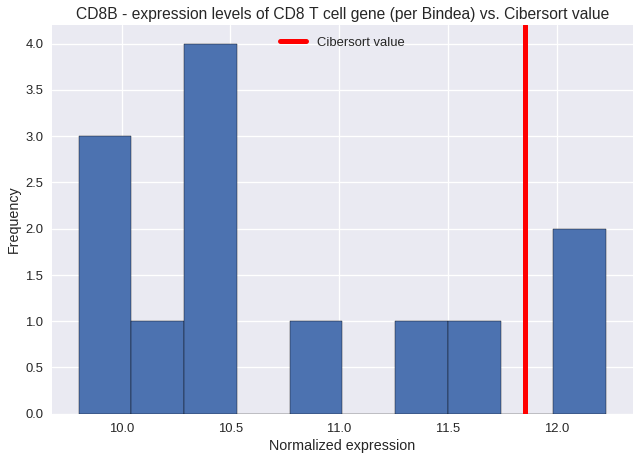

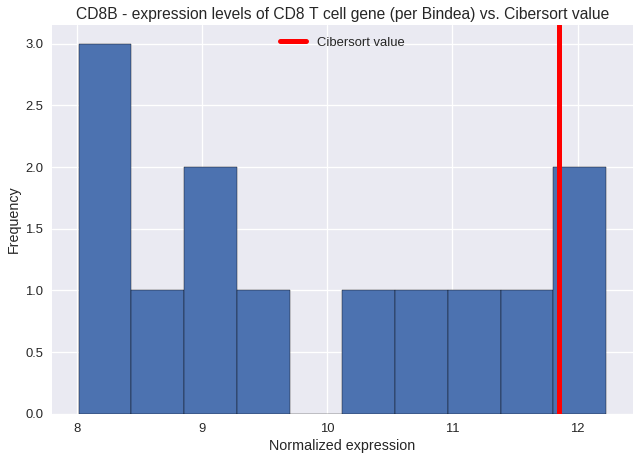

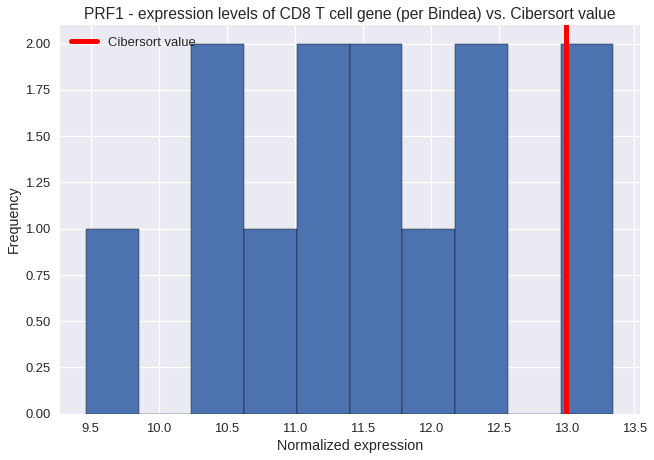

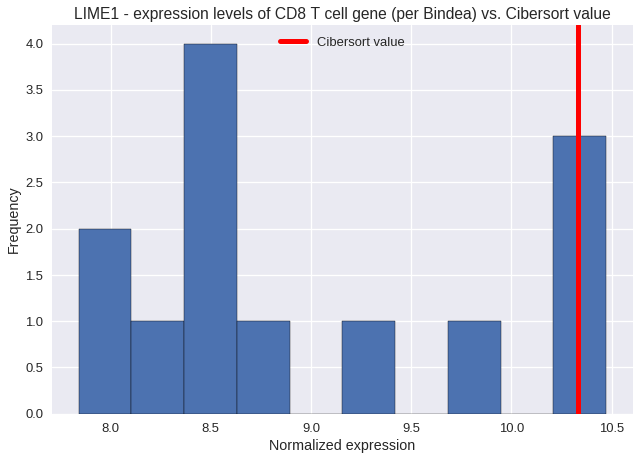

In [62]:
count=0
for _,row in matching2[T_cell_cols].iterrows():
    count += 1
    fig = plt.figure()
    row.hist(ax=fig.gca(), edgecolor="k")
    plt.title(row.name + ' - expression levels of CD8 T cell gene (per Bindea) vs. Cibersort value')
    plt.xlabel('Normalized expression')
    plt.ylabel('Frequency')
    cibval = np.log2(lm22[lm22['Gene symbol']==row.name]['T cells CD8'].iloc[0])
    plt.axvline(x=cibval, lw=5, label='Cibersort value', c='r')
    plt.legend(loc='best')
    fig.savefig('plots/variance_selected_%d.png' % count, dpi=300) 

In [57]:
!convert variance_selected_*.png -append allvariance.png

In [75]:
# join the identical genes with multiple transcripts (LM22 is aggregated to gene level)
df_tmp = matching2[T_cell_cols].reset_index()
df_tmp2 = pd.melt(df_tmp, id_vars='geneid') 
assert matching2[T_cell_cols].shape[0] * matching2[T_cell_cols].shape[1] == df_tmp2.shape[0]
df_tmp2.shape, matching2[T_cell_cols].shape

((143, 3), (11, 13))

In [76]:
df_tmp2.head()

,geneid,variable,value
0,ZFP36L2,Tcell | CD8 | 0,8.874488
1,ZFP36L2,Tcell | CD8 | 0,11.901583
2,ZFP36L2,Tcell | CD8 | 0,9.862387
3,CD8A,Tcell | CD8 | 0,11.456735
4,FLT3LG,Tcell | CD8 | 0,7.134392


geneid
CD8A       Axes(0.125,0.125;0.775x0.755)
CD8B       Axes(0.125,0.125;0.775x0.755)
FLT3LG     Axes(0.125,0.125;0.775x0.755)
GZMM       Axes(0.125,0.125;0.775x0.755)
LIME1      Axes(0.125,0.125;0.775x0.755)
PRF1       Axes(0.125,0.125;0.775x0.755)
ZFP36L2    Axes(0.125,0.125;0.775x0.755)
Name: value, dtype: object

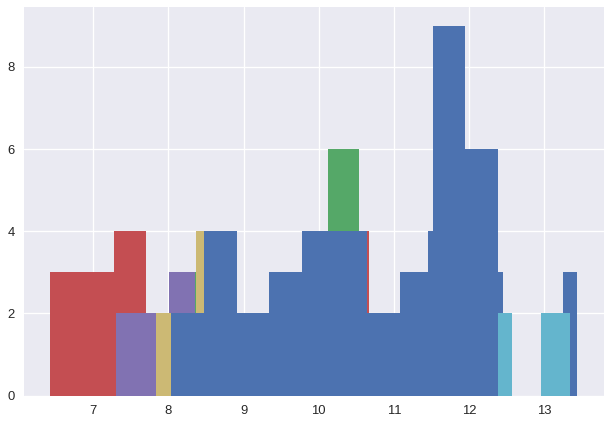

In [77]:
# sanity check that we got a number of genes in here..
df_tmp2.groupby('geneid')['value'].hist()

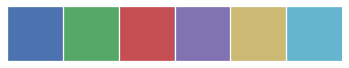

In [83]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

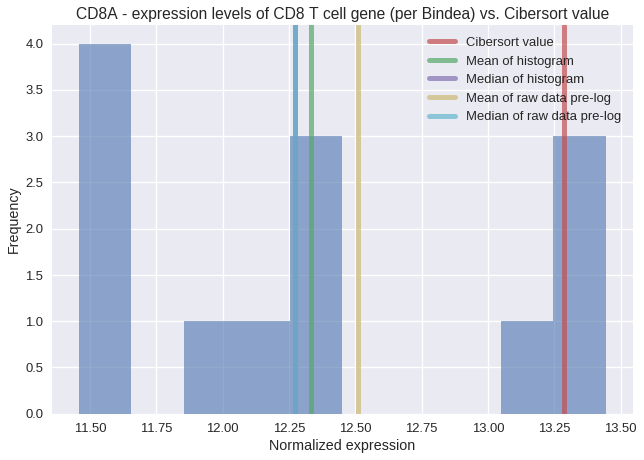

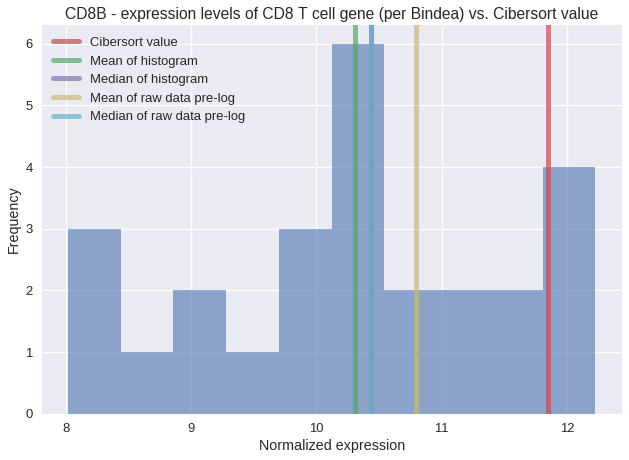

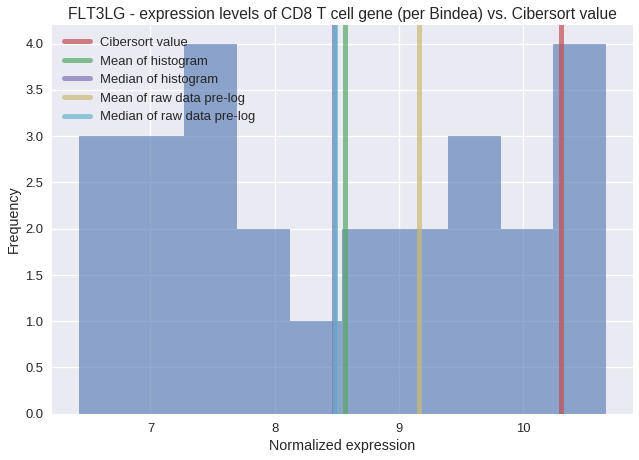

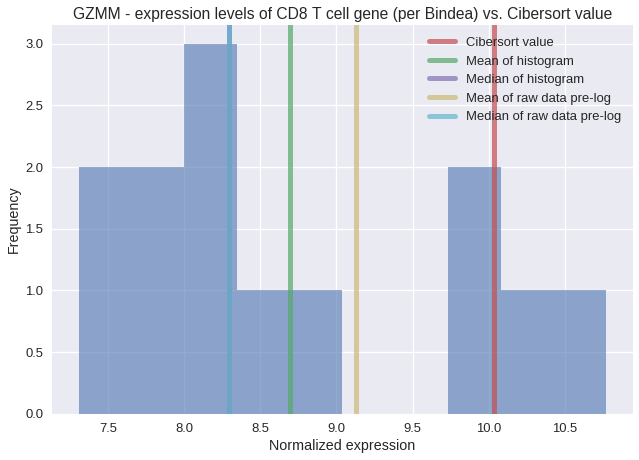

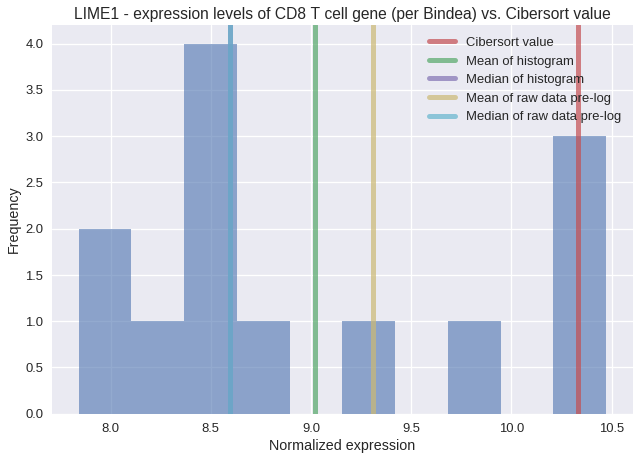

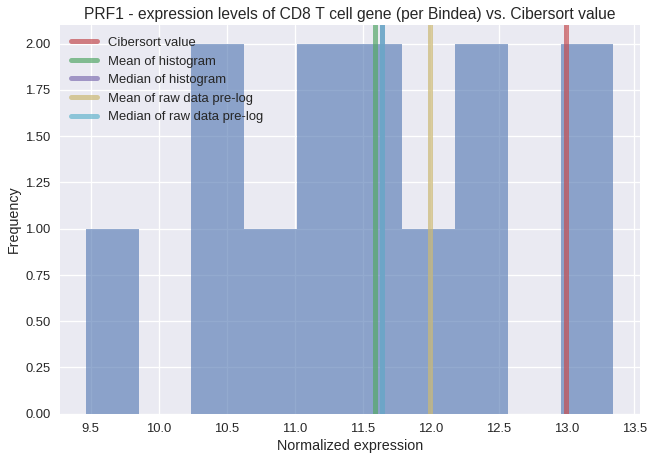

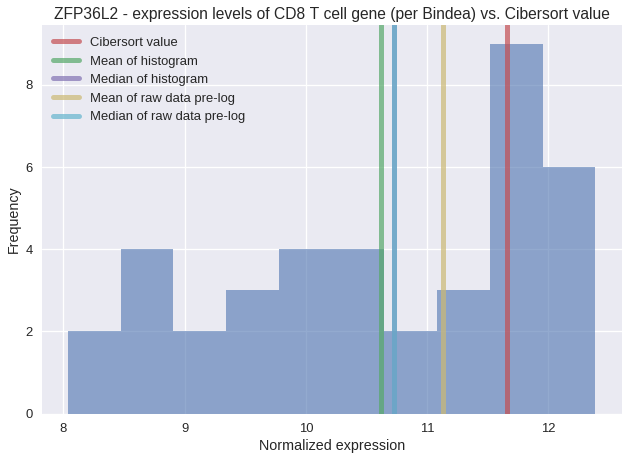

In [93]:
# replot in combined form -- all transcripts for same gene are now histogrammed together
# and output computed means to see how we would choose a point estimate
count=0
for key,grp in df_tmp2.groupby('geneid'):
    count += 1
    fig, ax = plt.subplots()
    grp['value'].hist(ax=ax,
                      #edgecolor="k",
                      color=current_palette[0],
                      alpha=.6
                     )
    plt.title(key + ' - expression levels of CD8 T cell gene (per Bindea) vs. Cibersort value')
    plt.xlabel('Normalized expression')
    plt.ylabel('Frequency')
    cibval = np.log2(lm22[lm22['Gene symbol']==key]['T cells CD8'].iloc[0])
    plt.axvline(x=cibval, lw=5, label='Cibersort value', c=current_palette[2], zorder=3, alpha=.7)
    
    # compute mean of the log-transformed data, i.e. mean of histogram
    plt.axvline(x=grp['value'].mean(), lw=5, label='Mean of histogram', c=current_palette[1], zorder=5, alpha=.7)
    plt.axvline(x=grp['value'].median(), lw=5, label='Median of histogram', c=current_palette[3], zorder=5, alpha=.7)
    
    # compute mean of the unlogged data, then apply log transformation
    plt.axvline(x=np.log2(grp['value'].apply(np.exp2).mean()), lw=5, label='Mean of raw data pre-log', c=current_palette[4], zorder=5, alpha=.7)
    plt.axvline(x=np.log2(grp['value'].apply(np.exp2).median()), lw=5, label='Median of raw data pre-log', c=current_palette[5], zorder=5, alpha=.7)
    
    plt.legend(loc='best')
    #fig.savefig('plots/variance_selected_%d.png' % count, dpi=300) 
    #break

In [102]:
# replot in combined form -- all transcripts for same gene are now histogrammed together
# and output computed means to see how we would choose a point estimate
computed_means = []
for key,grp in df_tmp2.groupby('geneid'):
    cibval = np.log2(lm22[lm22['Gene symbol']==key]['T cells CD8'].iloc[0])
    computed_means.append([
        key,
        cibval,
        grp['value'].mean(), # # compute mean of the log-transformed data, i.e. mean of histogram
        grp['value'].median(), # # compute mean of the log-transformed data, i.e. mean of histogram
        np.log2(grp['value'].apply(np.exp2).mean()), # # compute mean of the unlogged data, then apply log transformation
        np.log2(grp['value'].apply(np.exp2).median()) # # compute mean of the unlogged data, then apply log transformation
    ])
computed_means = pd.DataFrame(computed_means, columns=['key', 'cibval', 'mean_log', 'median_log', 'mean_raw', 'median_raw'])
computed_means

,key,cibval,mean_log,median_log,mean_raw,median_raw
0,CD8A,13.286375,12.333499,12.274078,12.508897,12.274078
1,CD8B,11.852515,10.310225,10.433044,10.796010,10.433374
2,FLT3LG,10.307237,8.561756,8.473939,9.160435,8.481212
3,GZMM,10.034784,8.692788,8.296966,9.124980,8.296966
4,LIME1,10.330616,9.020797,8.594588,9.311183,8.594588
5,PRF1,12.998329,11.594363,11.644135,11.993963,11.644135
6,ZFP36L2,11.656350,10.621854,10.724700,11.135690,10.724700


In [106]:
print("difference in medians is insignificant:")
(computed_means.median_log - computed_means.median_raw).describe()

difference in medians is insignificant:


count    7.000000
mean    -0.001086
std      0.002731
min     -0.007273
25%     -0.000165
50%      0.000000
75%      0.000000
max      0.000000
dtype: float64

In [109]:

def savefig(fig, *args, **kwargs):
    """
    Wrap figure.savefig defaulting to tight bounding box.
    From https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/axisgrid.py#L1840
    """
    kwargs.setdefault("bbox_inches", "tight")
    fig.savefig(*args, **kwargs)

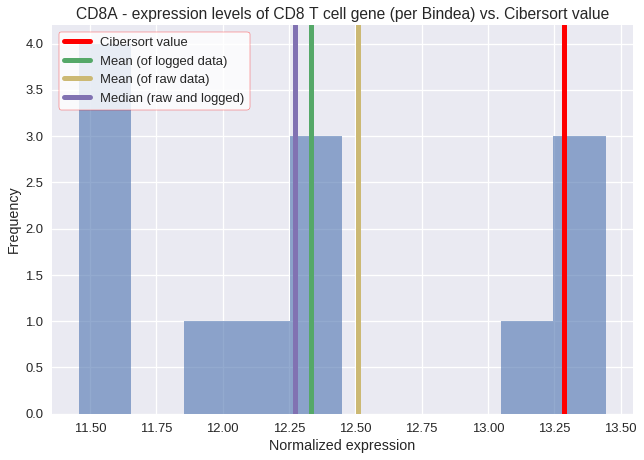

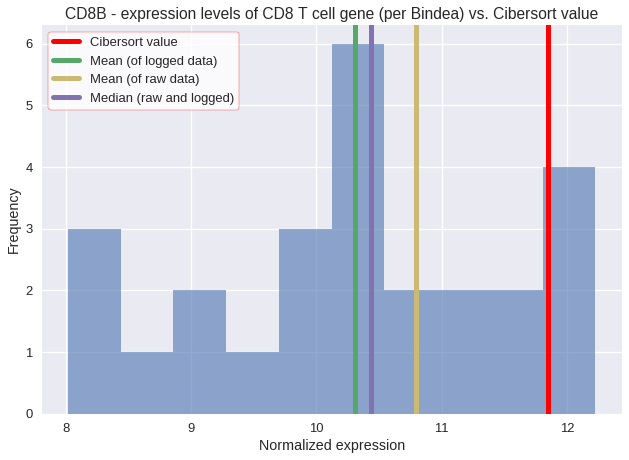

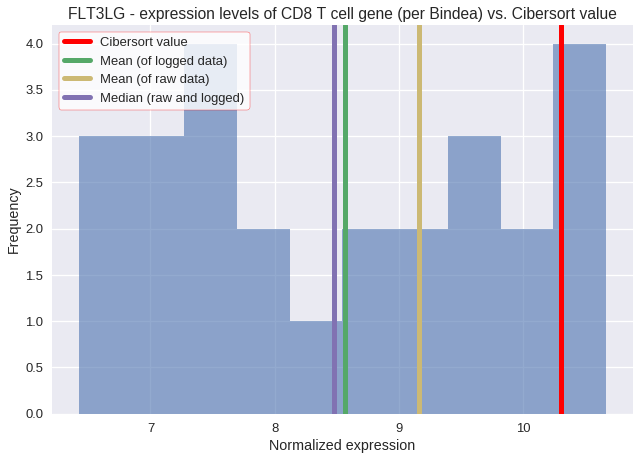

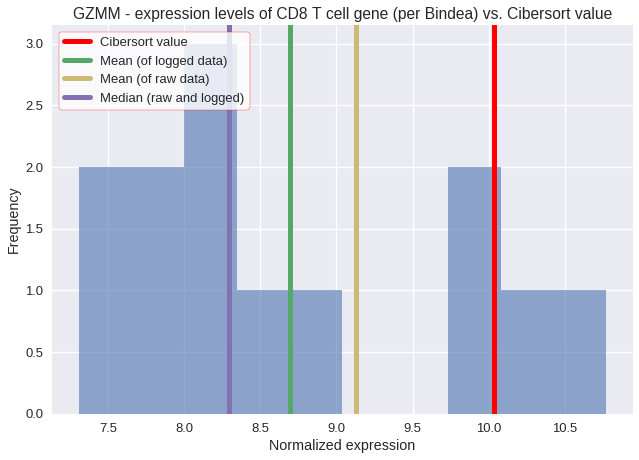

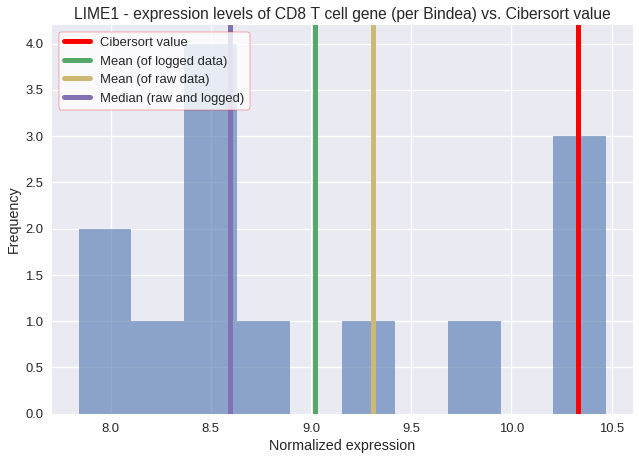

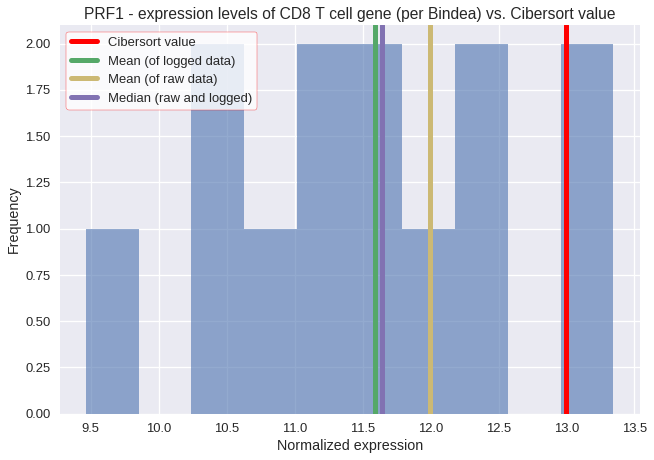

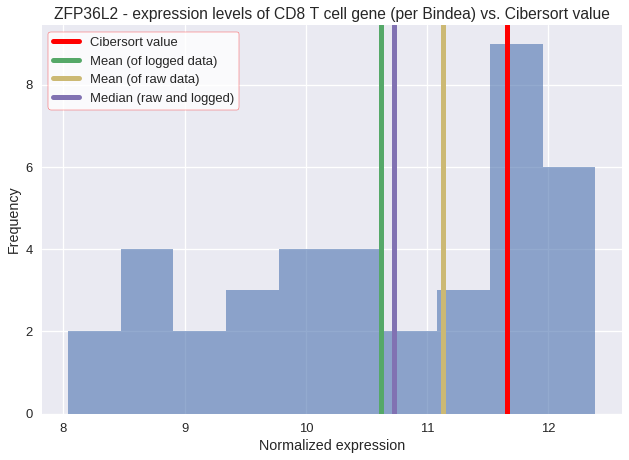

In [114]:
# replot in combined form -- all transcripts for same gene are now histogrammed together
# and output computed means to see how we would choose a point estimate
# median_log and median_raw are the same
for key,grp in df_tmp2.groupby('geneid'):
    fig, ax = plt.subplots()
    grp['value'].hist(ax=ax,
                      #edgecolor="k",
                      color=current_palette[0],
                      alpha=.6
                     )
    plt.title(key + ' - expression levels of CD8 T cell gene (per Bindea) vs. Cibersort value')
    plt.xlabel('Normalized expression') # log2 normalized
    plt.ylabel('Frequency')
    cibval = np.log2(lm22[lm22['Gene symbol']==key]['T cells CD8'].iloc[0])
    plt.axvline(x=cibval,
                lw=5,
                label='Cibersort value',
                c='r',
                #c=current_palette[2],
                zorder=3)
    
    # compute mean of the log-transformed data, i.e. mean of histogram
    plt.axvline(x=grp['value'].mean(), lw=5, label='Mean (of logged data)', c=current_palette[1], zorder=5)
    
    # compute mean of the unlogged data, then apply log transformation
    plt.axvline(x=np.log2(grp['value'].apply(np.exp2).mean()), lw=5, label='Mean (of raw data)', c=current_palette[4], zorder=5)
    #plt.axvline(x=np.log2(grp['value'].apply(np.exp2).median()), lw=5, label='Median of raw data pre-log', c=current_palette[5], zorder=5, alpha=.7)

    plt.axvline(x=grp['value'].median(), lw=5, label='Median (raw and logged)', c=current_palette[3], zorder=5)

    
    legend = plt.legend(loc='upper left', frameon=True)
    frame = legend.get_frame()
    frame.set_edgecolor('red')
    frame.set_facecolor('white')
    
    savefig(fig, 'plots/variance_joinedtranscripts_gene_%s.png' % key, dpi=300) 
    savefig(fig, 'plots/variance_joinedtranscripts_gene_%s.pdf' % key, dpi=300) 
    #break

## Observations

There's a lot of variance

Cibersort is choosing a bizarre point estimate.

## What do those CD8 T cell genes look like in samples from other cell types?


The distributions are much wider, and seem often to be more Gaussian

Both could be due to having much higher sample size in the histogram -- the number of other cell types is high


In [58]:
other_cols = matching.columns[~matching.columns.str.contains('CD8')]
other_cols

Index([u'Tcell 1', u'Tcell 2', u'Tcell 3', u'Bcell 1', u'Bcell 2', u'Bcell 3',
       u'Bcell 1', u'Bcell 2', u'Bcell 3', u'monocyte 1',
       ...
       u'TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1]',
       u'TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2]',
       u'TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3]', u'T cells CD4 naive_1',
       u'T cells CD4 naive_2', u'T cells CD4 naive_3',
       u'TH_1 [TREGs_GSE4527|GSM101518]', u'T cells regulatory (Tregs)_1',
       u'TH_2 [TREGs_GSE4527|GSM101520]', u'T cells regulatory (Tregs)_2'],
      dtype='object', length=374)

In [63]:
for i in matching.index:
    assert i in cd8_t.symbol.dropna().unique()

/home/maxim/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


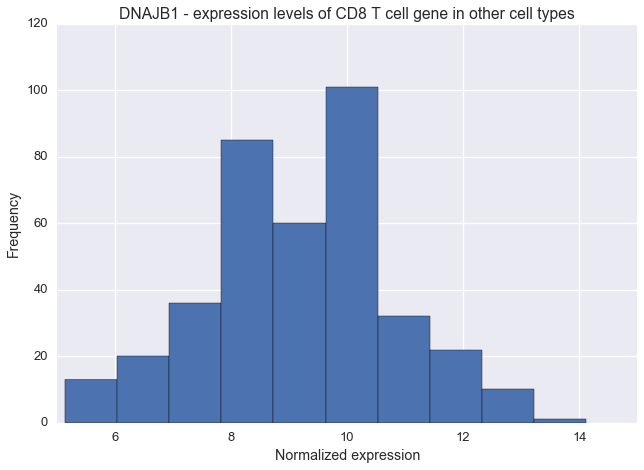

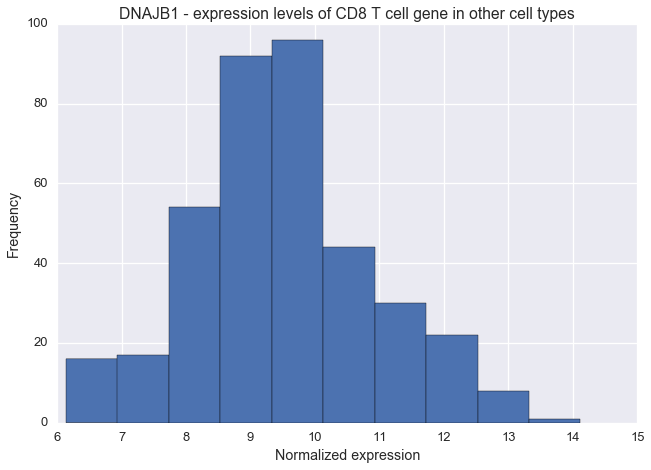

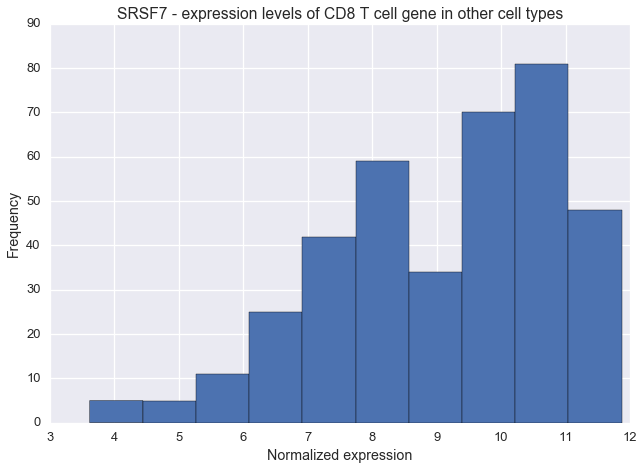

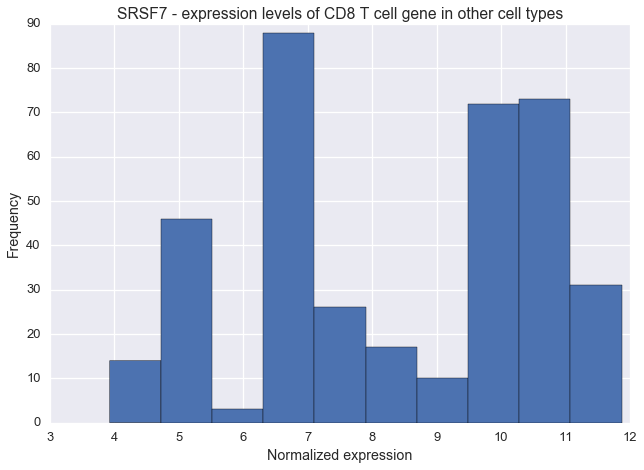

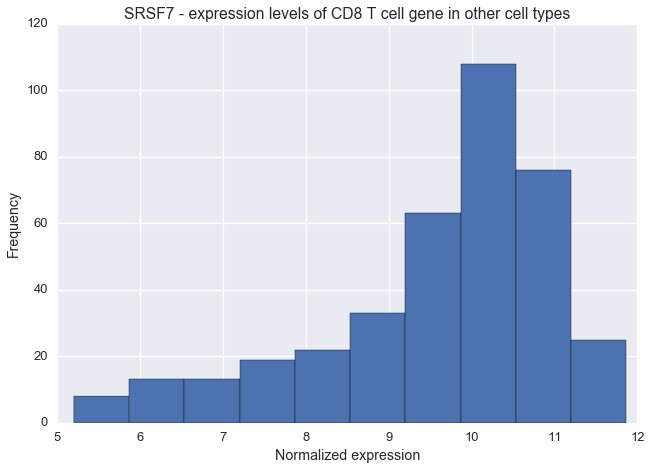

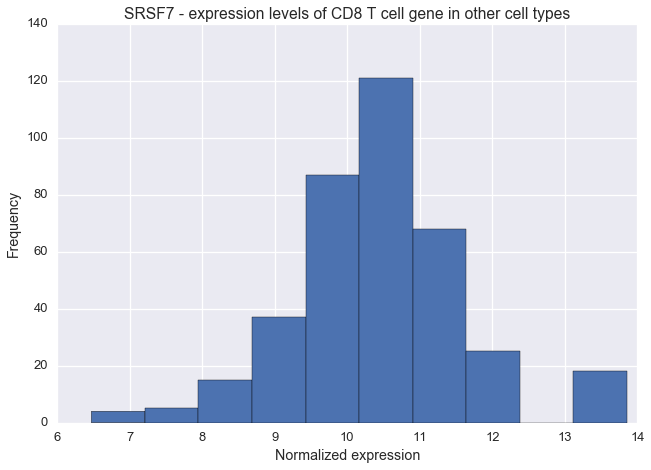

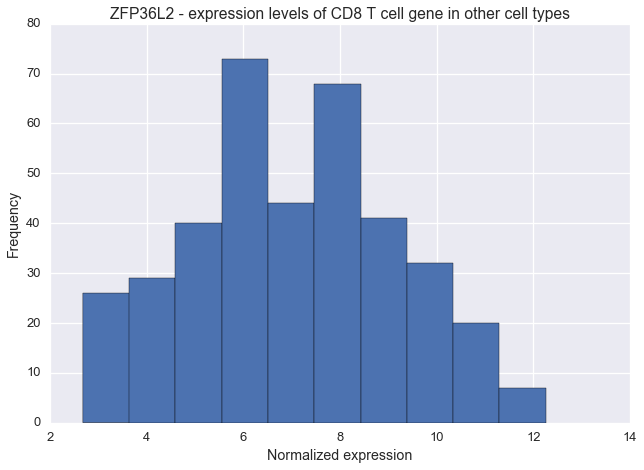

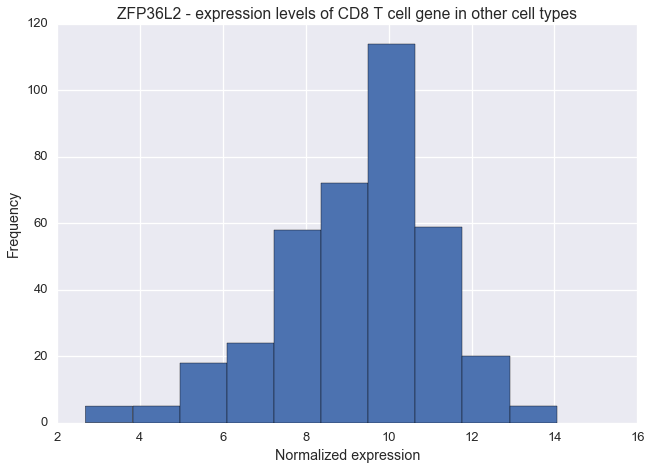

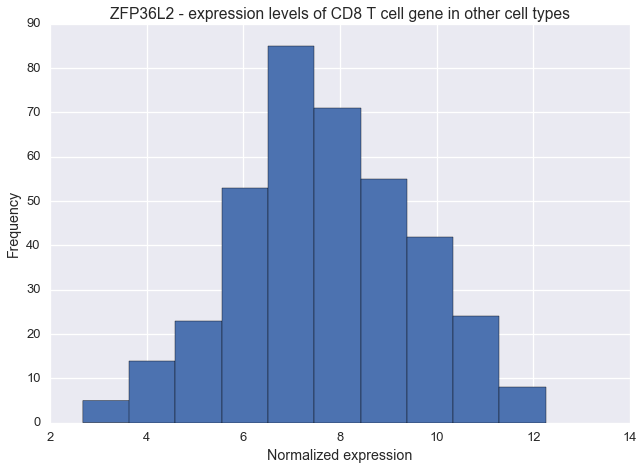

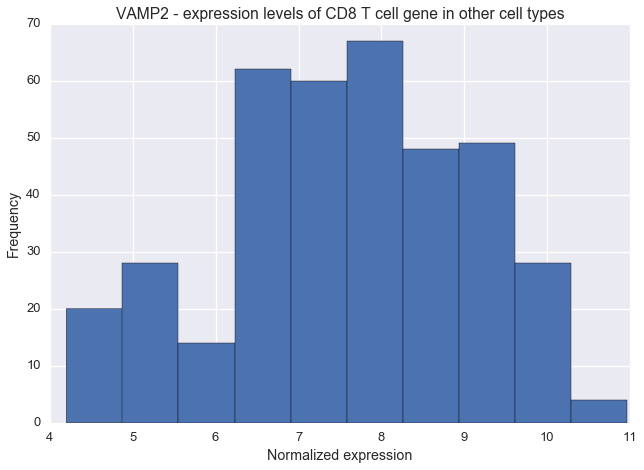

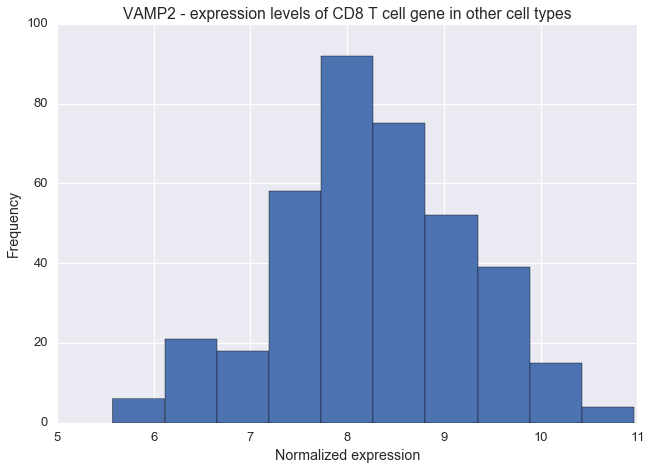

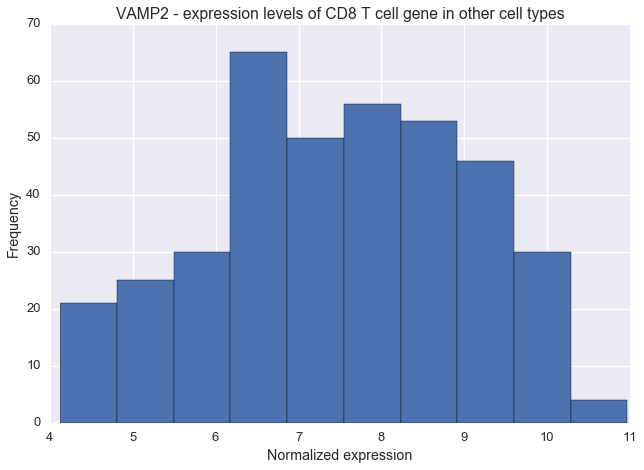

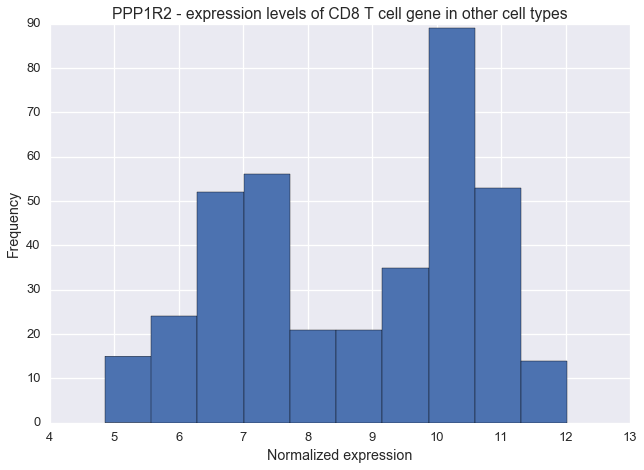

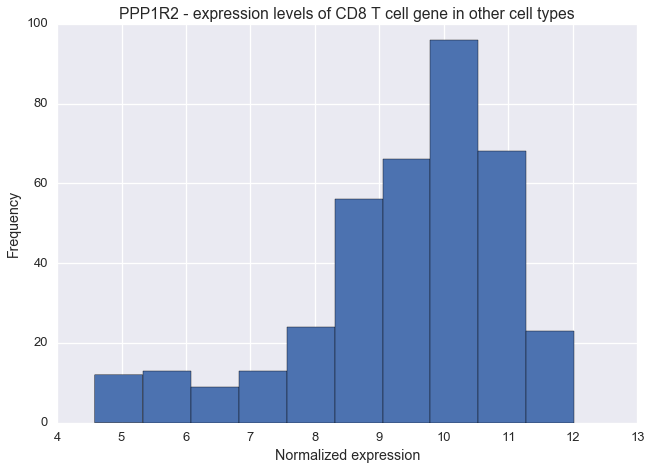

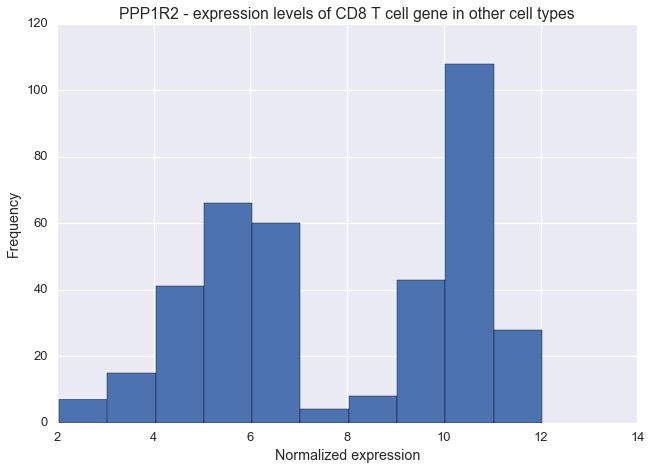

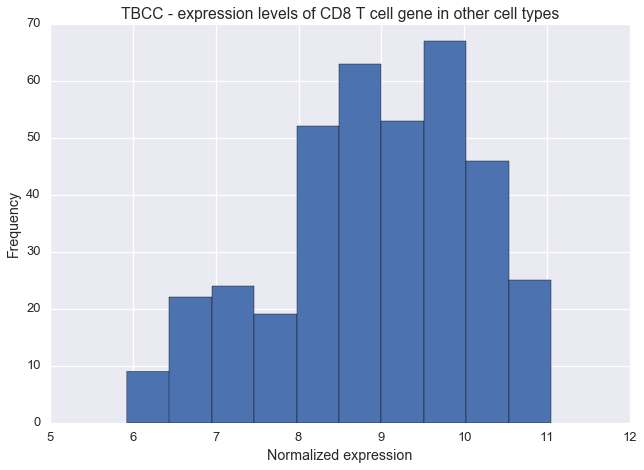

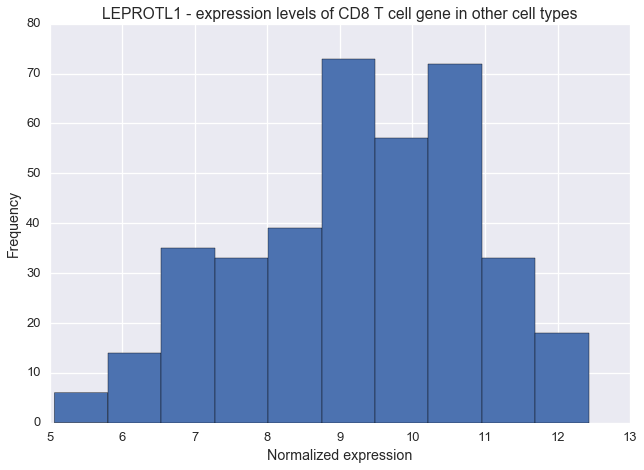

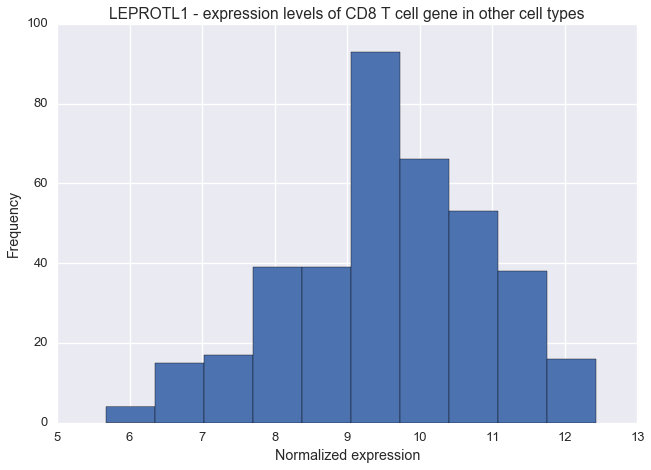

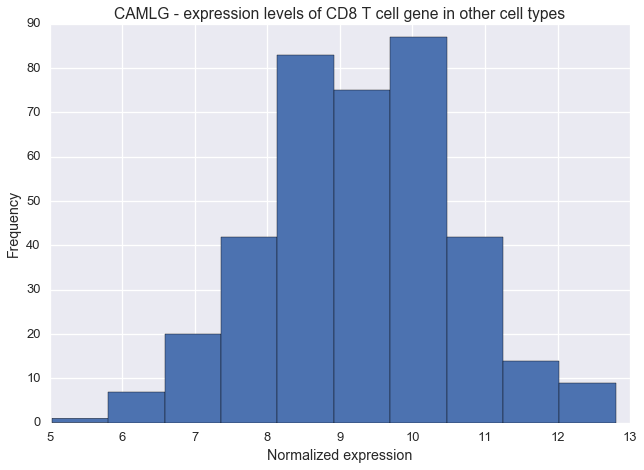

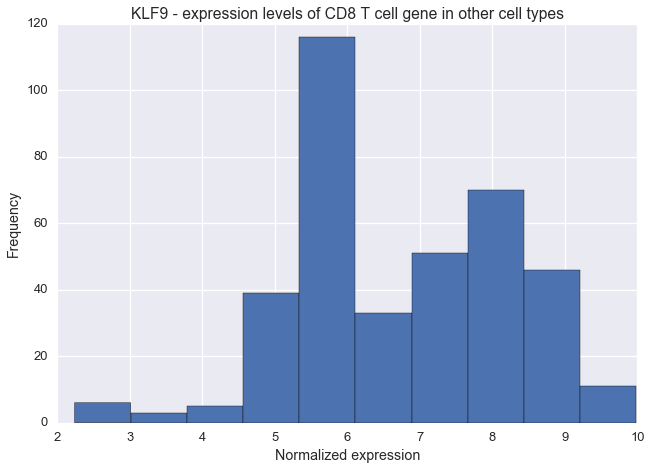

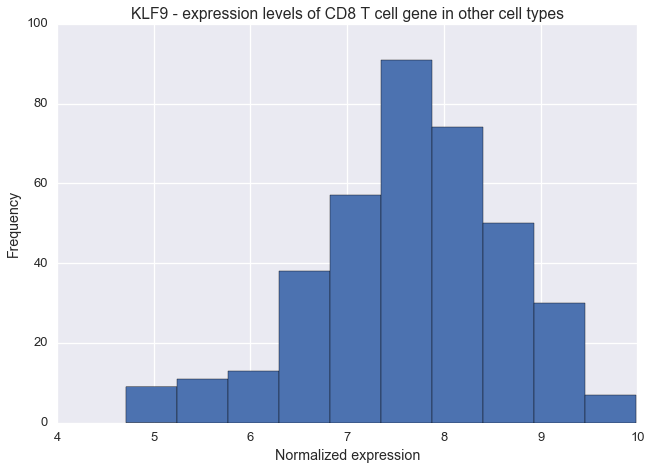

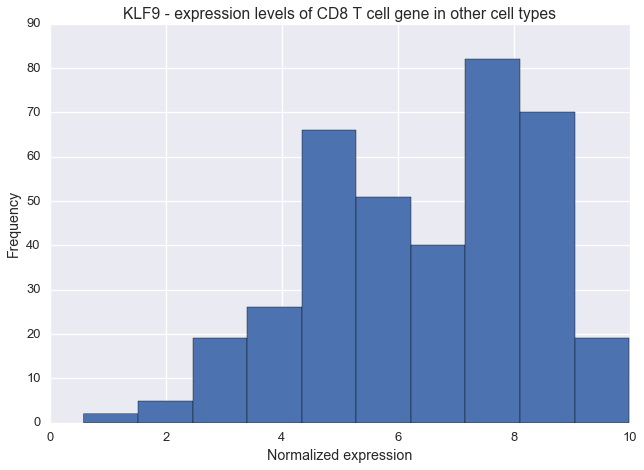

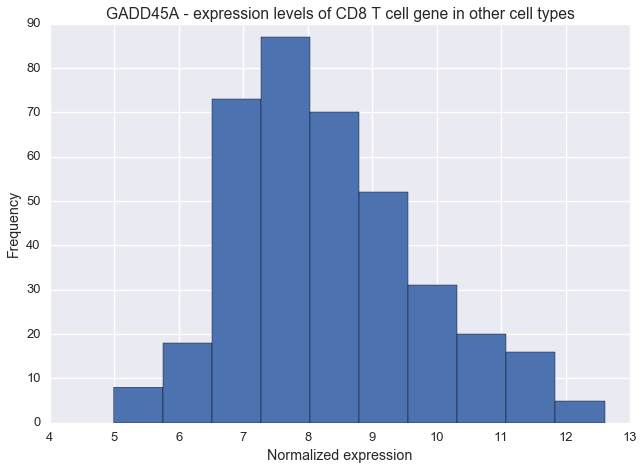

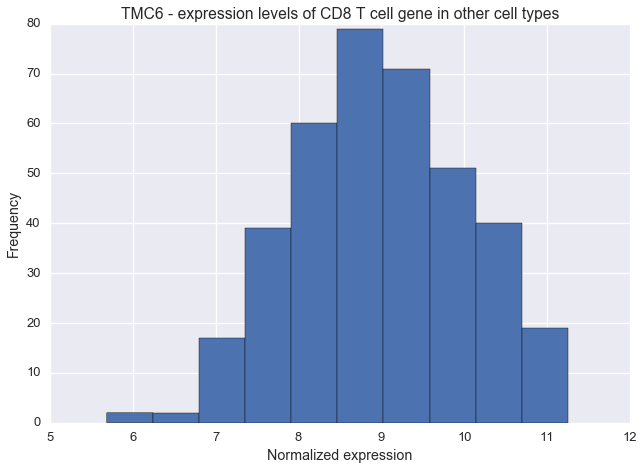

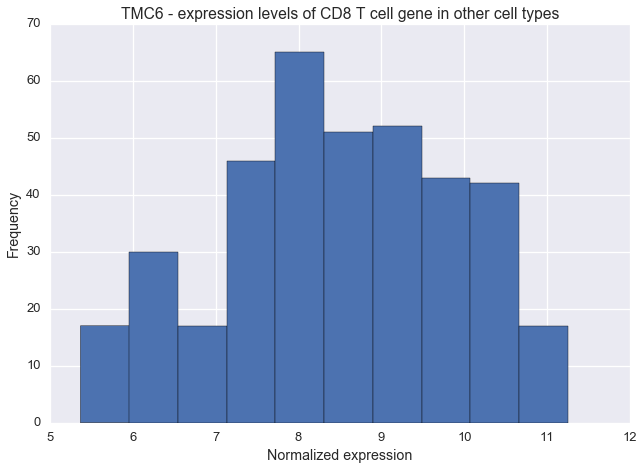

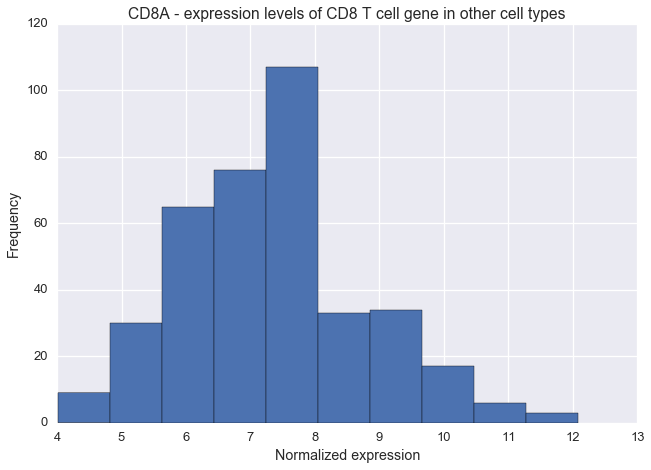

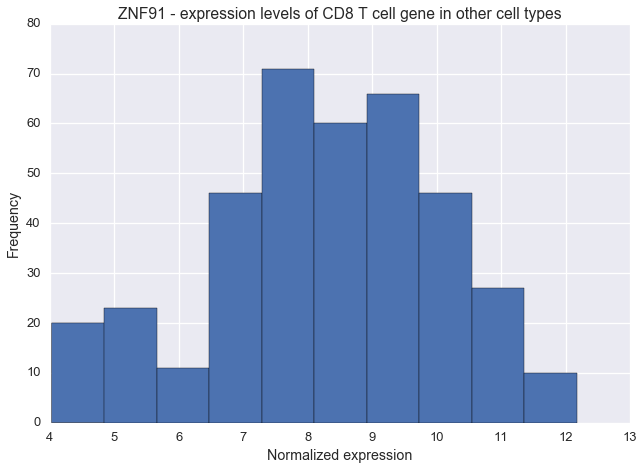

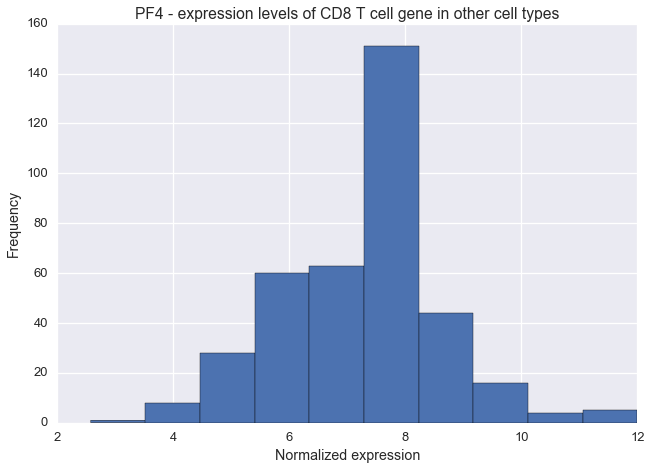

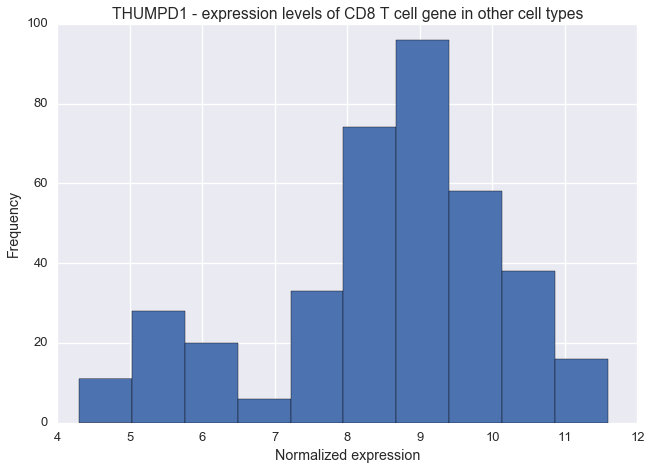

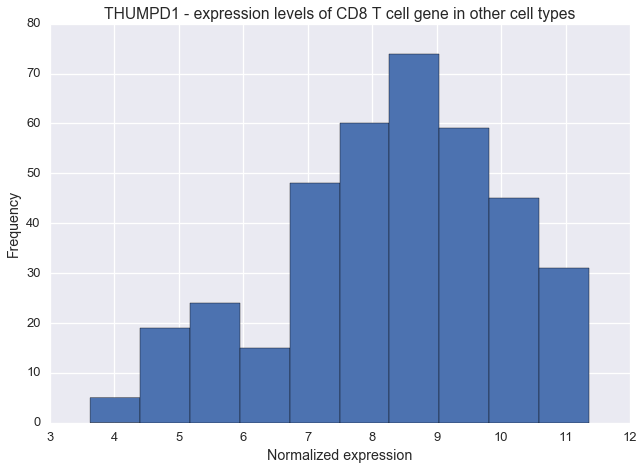

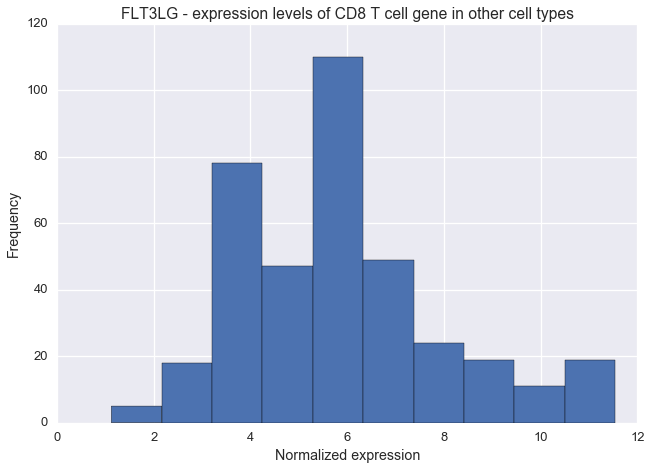

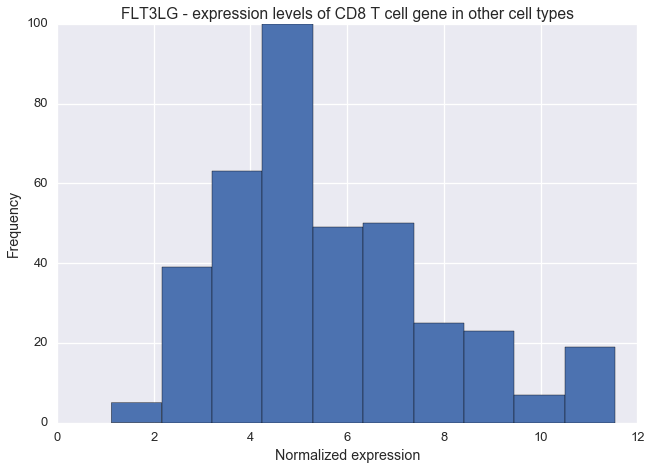

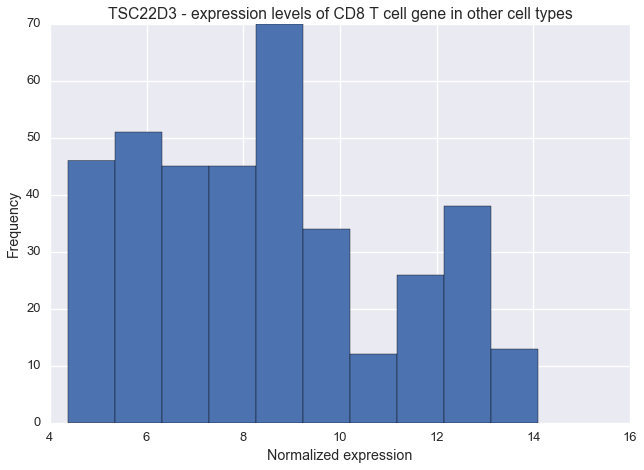

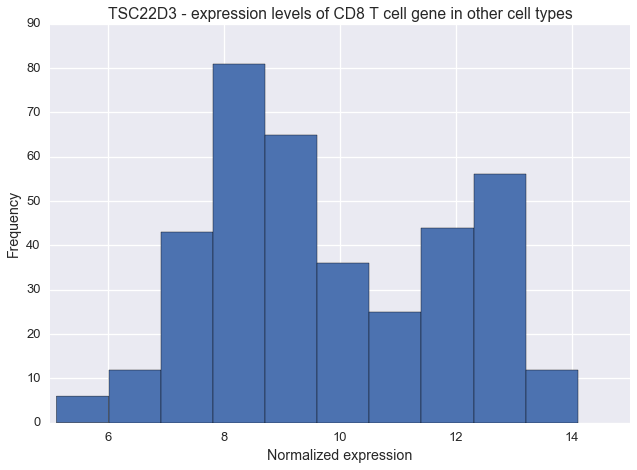

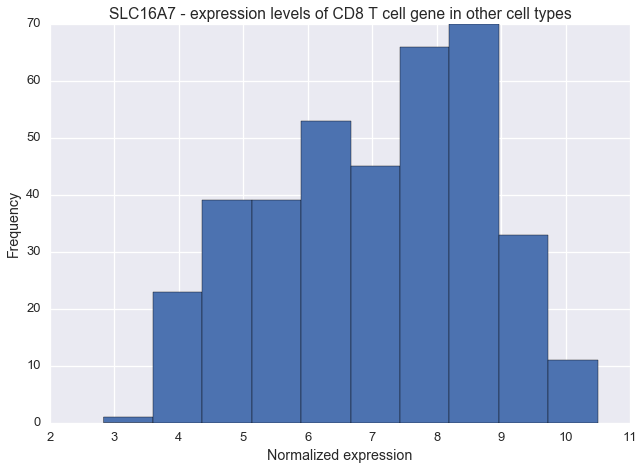

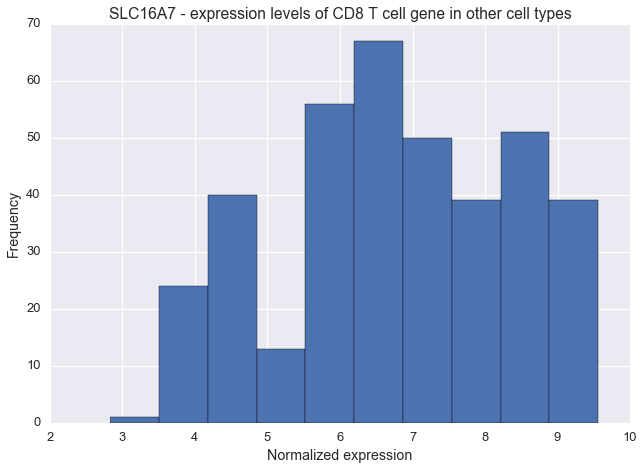

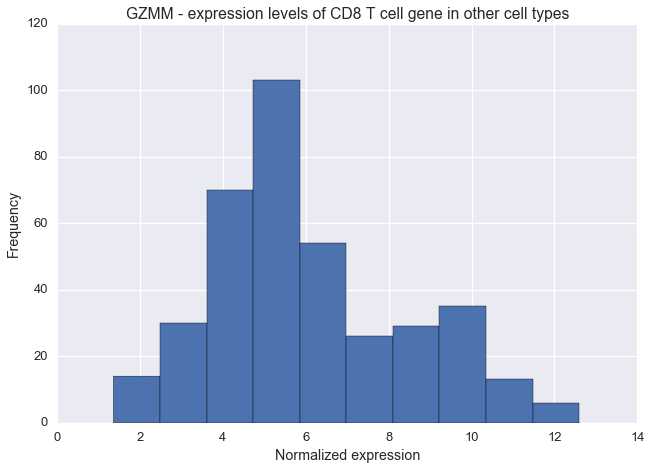

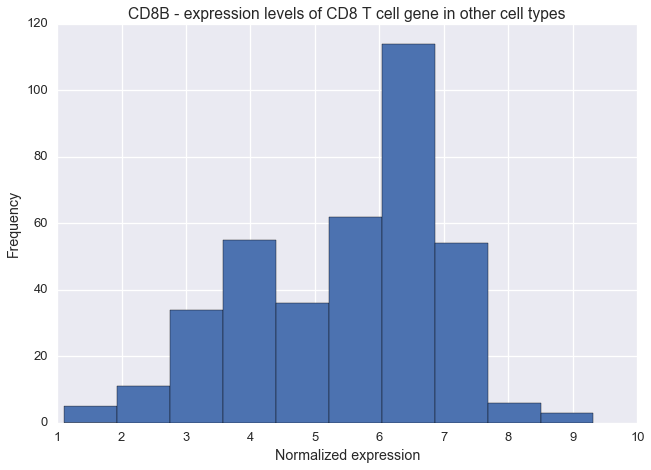

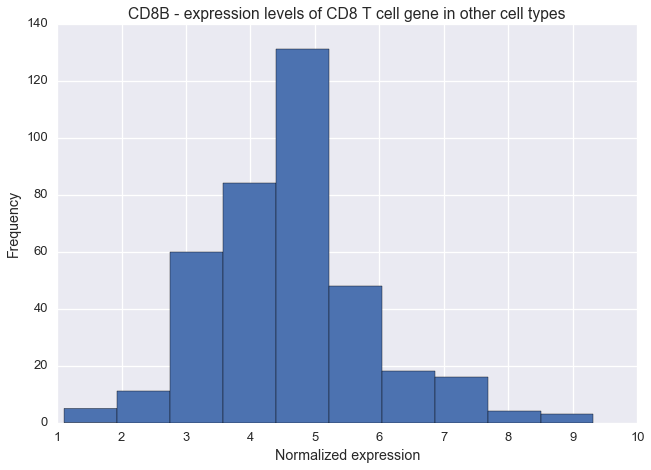

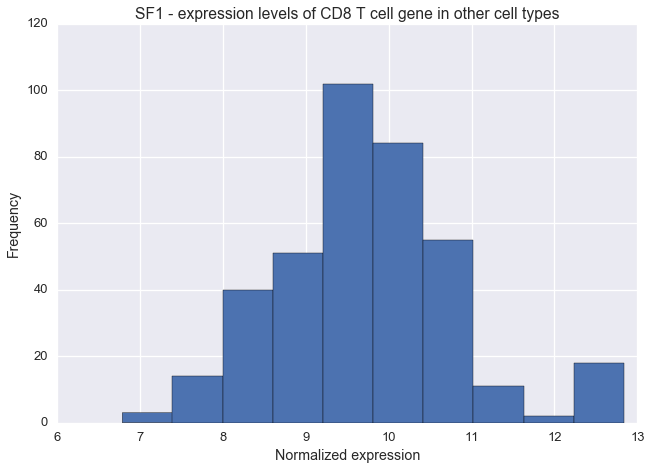

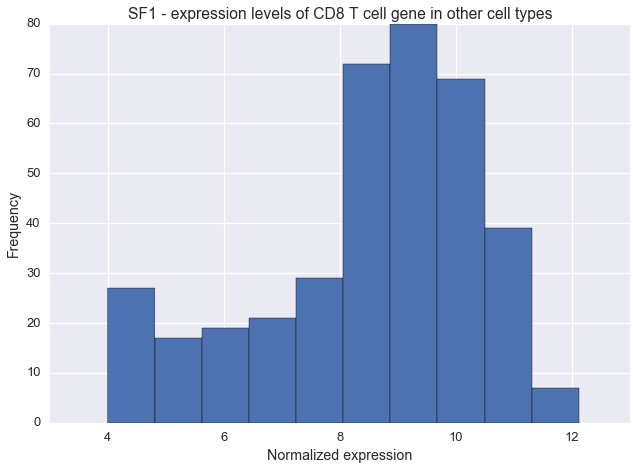

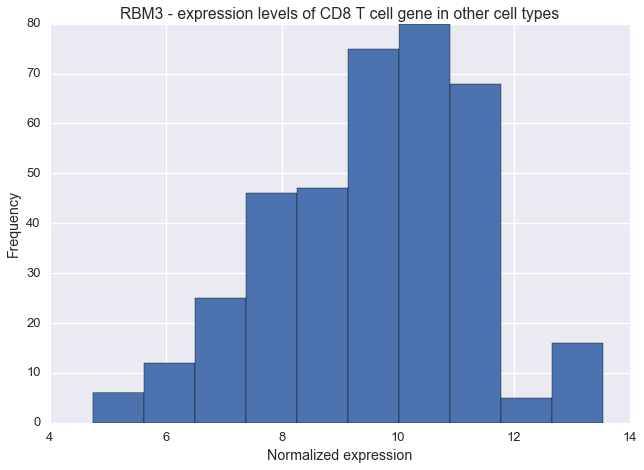

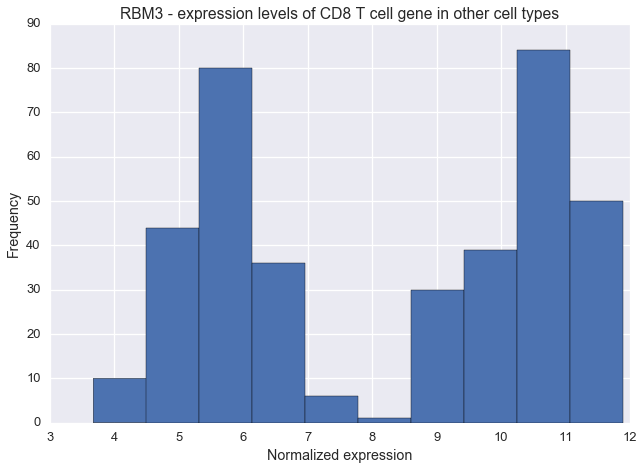

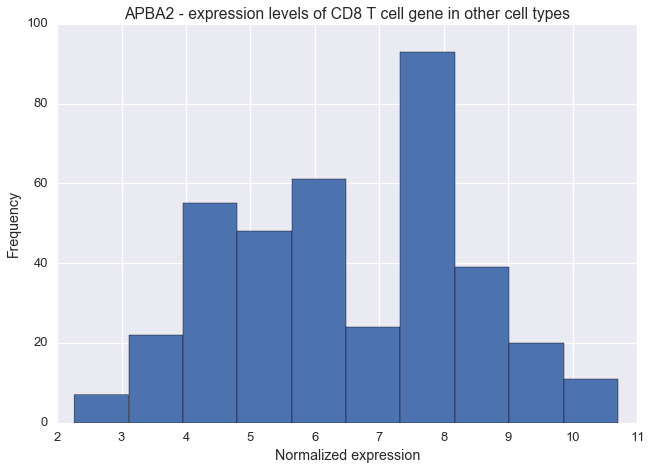

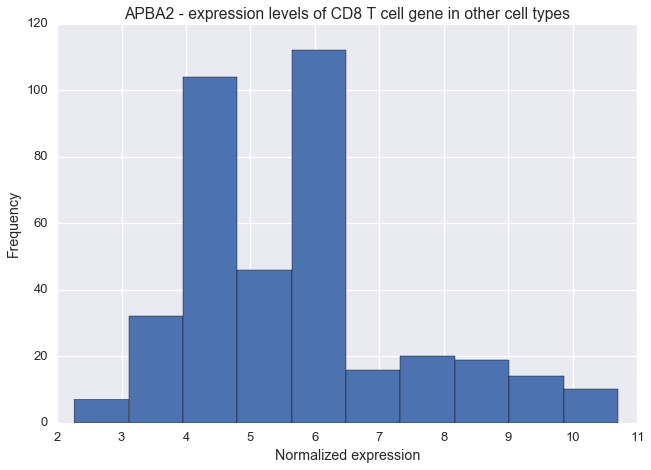

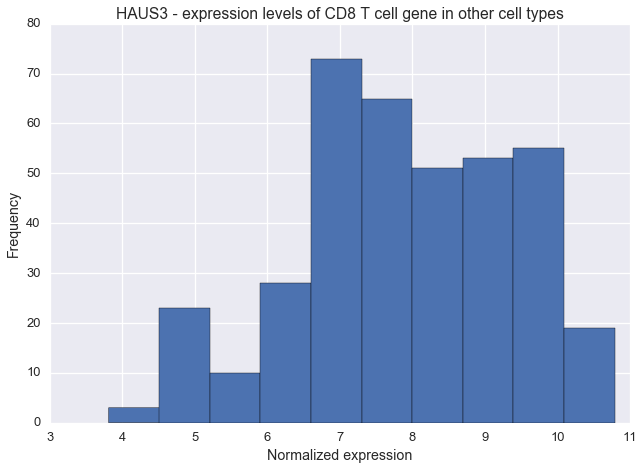

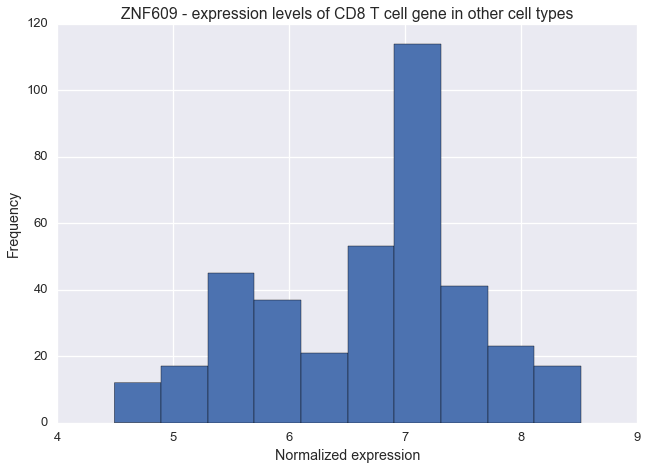

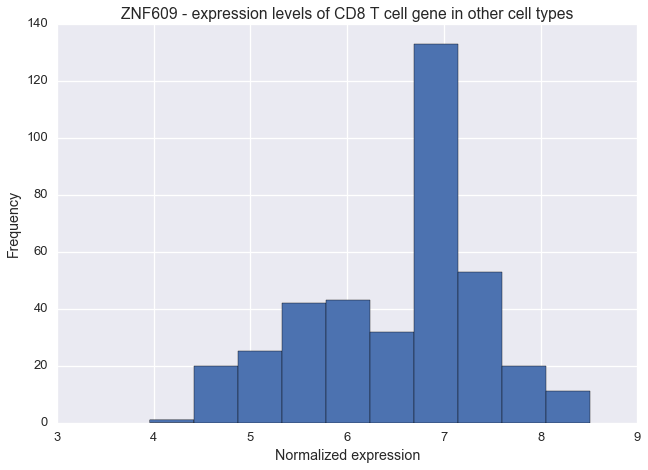

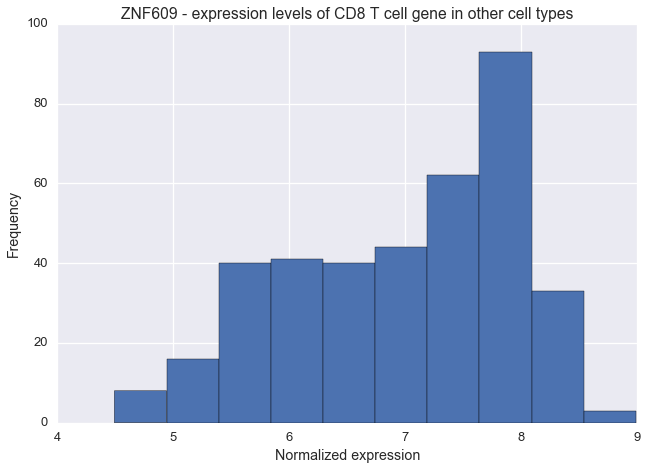

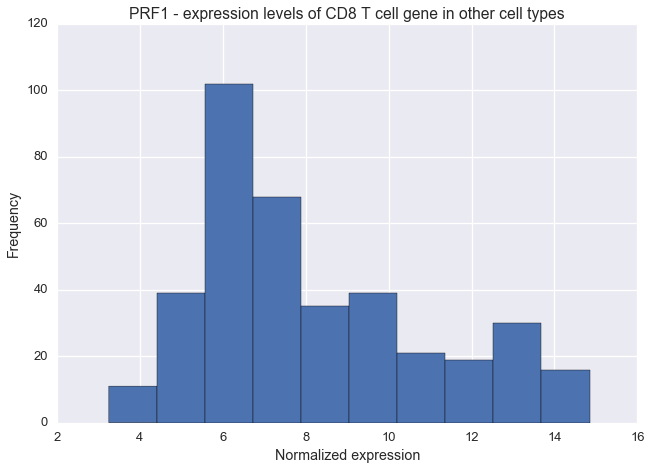

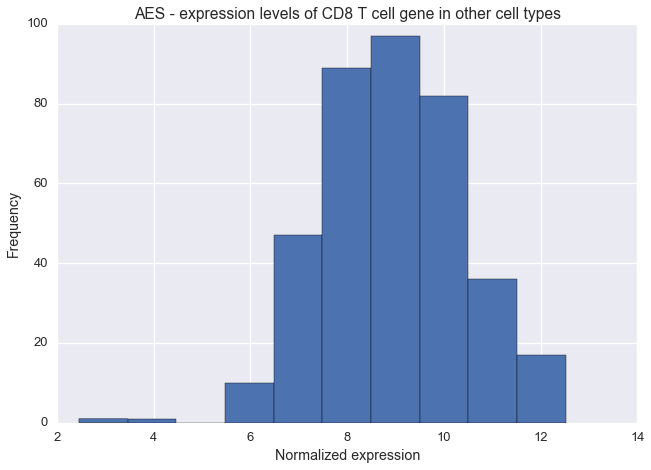

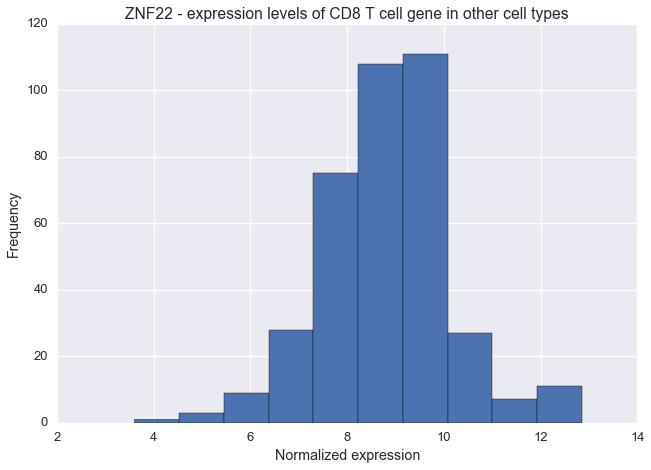

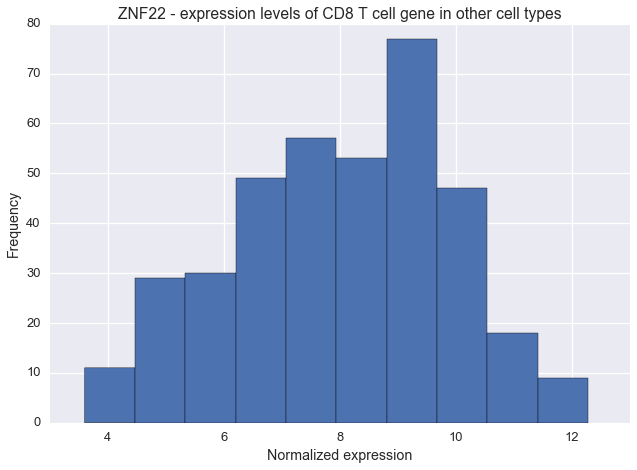

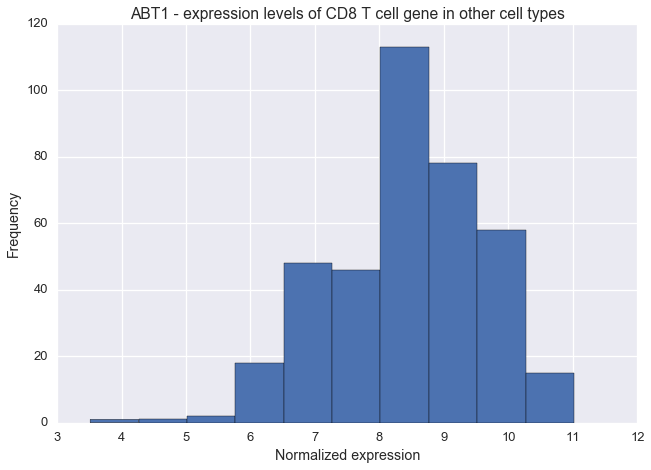

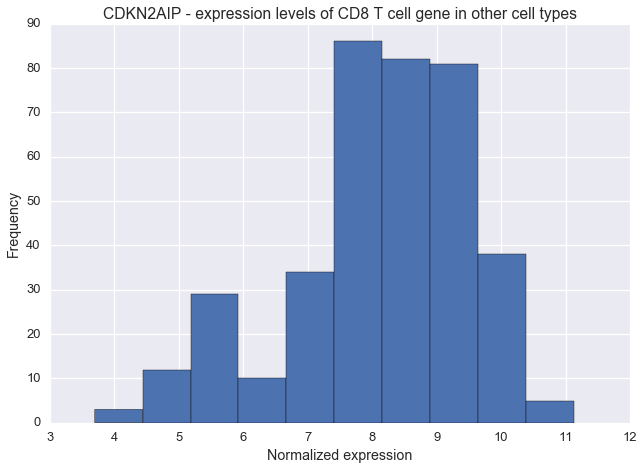

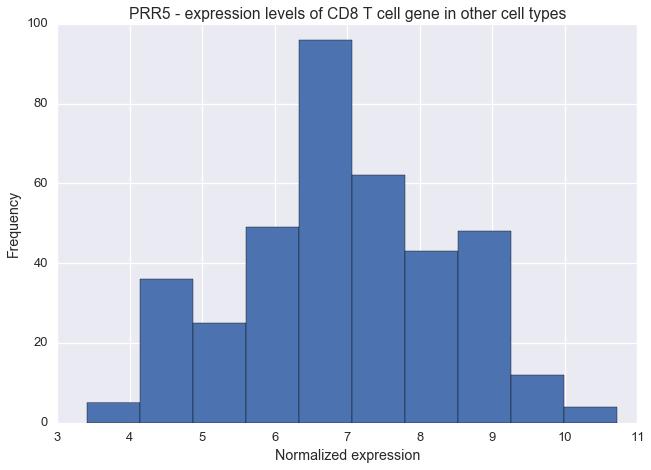

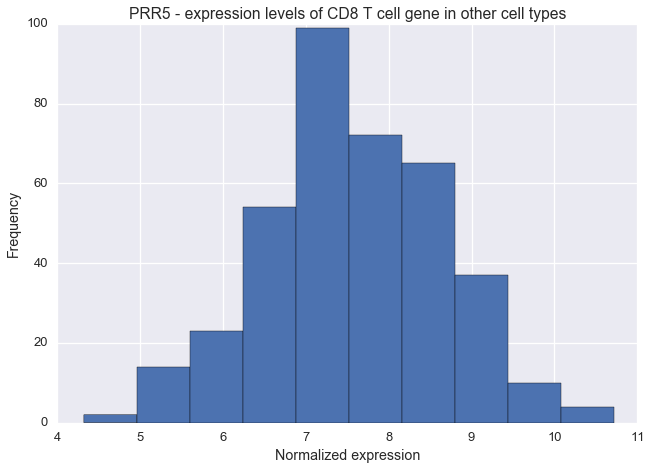

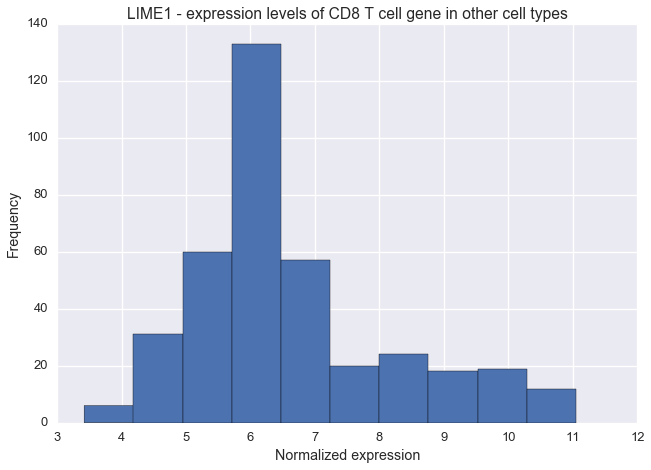

In [65]:
for _,row in matching[other_cols].iterrows():
    fig = plt.figure()
    row.hist(ax=fig.gca())
    plt.title(row.name + ' - expression levels of CD8 T cell gene in other cell types')
    plt.xlabel('Normalized expression')
    plt.ylabel('Frequency')

## What do non-CD8 T cell genes look line in CD8 T cell samples?

Lots of other genes have high expressions -- but perhaps not unique enough or not high enough to be an outlier

In [66]:
non_matching = df[~df['geneid'].isin(cd8_t.symbol.dropna().unique())].copy()
print(non_matching.shape)
del non_matching['probeid']
non_matching = non_matching.set_index('geneid')
non_matching.head()

(17860, 389)


,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,PRB12542.Raji,PRB12543.THP.1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
geneid,,,,,,,,,,,,,,,,,,,,,
RFC2,11.039237,10.902145,10.947246,11.245807,11.124343,11.270386,9.698720,9.479000,10.185702,10.695897,...,8.121576,8.302323,8.346271,7.826638,8.220406,7.945098,8.312302,7.511311,8.912680,6.975048
RFC2,11.481237,11.925266,11.495370,12.026271,12.073008,11.782891,10.084622,10.115609,10.315071,11.380321,...,8.121576,8.302323,8.346271,7.826638,8.220406,7.945098,8.312302,7.511311,8.912680,6.975048
HSPA6,7.566267,6.794052,7.323730,8.757997,8.029221,8.133908,7.525027,7.480168,7.305706,7.757543,...,3.699032,6.211958,7.146528,7.184944,4.436701,6.276476,6.358451,9.458804,7.601625,6.614524
HSPA6,6.261192,6.421526,7.393648,9.464272,8.857468,8.738285,4.785498,6.905928,4.900529,5.725332,...,3.699032,6.211958,7.146528,7.184944,4.436701,6.276476,6.358451,9.458804,7.601625,6.614524
PAX8,10.776342,10.335129,10.880744,10.608659,10.583569,10.589084,10.702947,10.666544,10.861115,10.947790,...,4.742353,6.875603,5.858304,4.990854,6.673049,6.630214,7.205951,7.082436,5.275805,7.302074


In [67]:
non_matching = non_matching.rename(columns=lambda x: column_mappings[x] if x in column_mappings else x)
non_matching.head()

,Tcell 1,Tcell 2,Tcell 3,Bcell 1,Bcell 2,Bcell 3,Bcell 1,Bcell 2,Bcell 3,monocyte 1,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],T cells CD4 naive_1,T cells CD4 naive_2,T cells CD4 naive_3,TH_1 [TREGs_GSE4527|GSM101518],T cells regulatory (Tregs)_1,TH_2 [TREGs_GSE4527|GSM101520],T cells regulatory (Tregs)_2
geneid,,,,,,,,,,,,,,,,,,,,,
RFC2,11.039237,10.902145,10.947246,11.245807,11.124343,11.270386,9.698720,9.479000,10.185702,10.695897,...,8.121576,8.302323,8.346271,7.826638,8.220406,7.945098,8.312302,7.511311,8.912680,6.975048
RFC2,11.481237,11.925266,11.495370,12.026271,12.073008,11.782891,10.084622,10.115609,10.315071,11.380321,...,8.121576,8.302323,8.346271,7.826638,8.220406,7.945098,8.312302,7.511311,8.912680,6.975048
HSPA6,7.566267,6.794052,7.323730,8.757997,8.029221,8.133908,7.525027,7.480168,7.305706,7.757543,...,3.699032,6.211958,7.146528,7.184944,4.436701,6.276476,6.358451,9.458804,7.601625,6.614524
HSPA6,6.261192,6.421526,7.393648,9.464272,8.857468,8.738285,4.785498,6.905928,4.900529,5.725332,...,3.699032,6.211958,7.146528,7.184944,4.436701,6.276476,6.358451,9.458804,7.601625,6.614524
PAX8,10.776342,10.335129,10.880744,10.608659,10.583569,10.589084,10.702947,10.666544,10.861115,10.947790,...,4.742353,6.875603,5.858304,4.990854,6.673049,6.630214,7.205951,7.082436,5.275805,7.302074


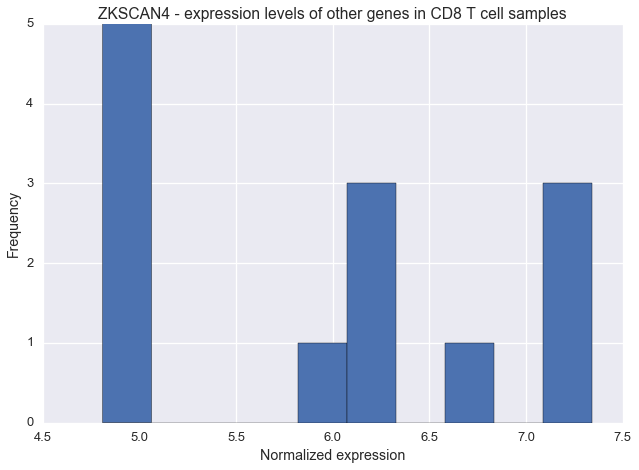

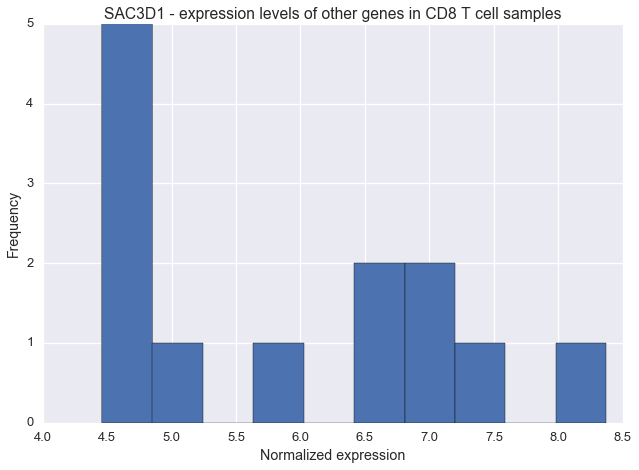

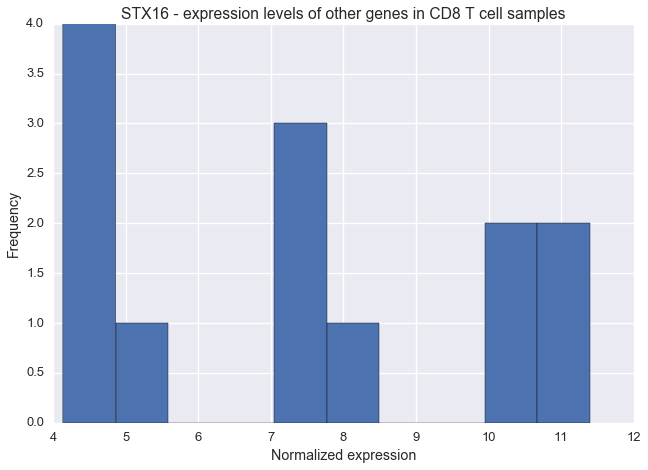

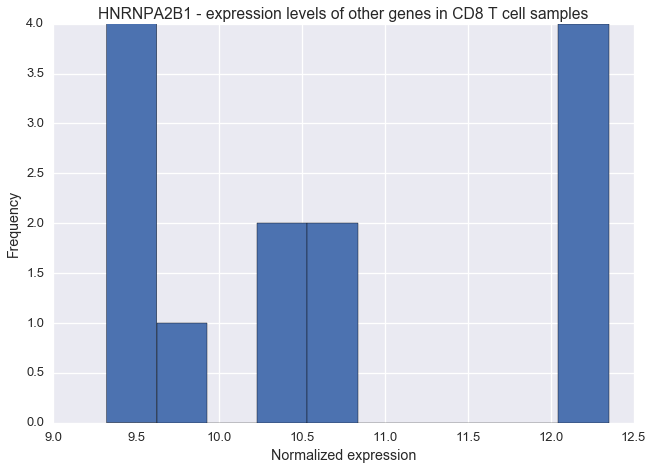

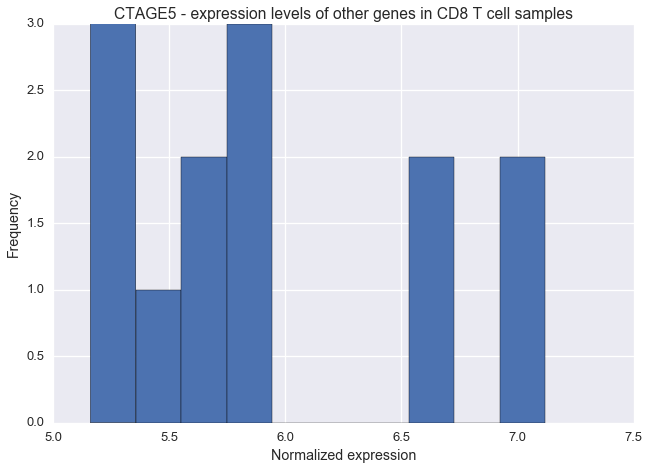

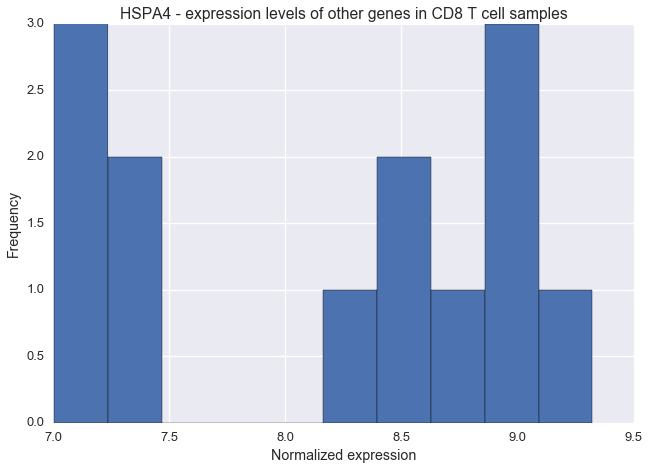

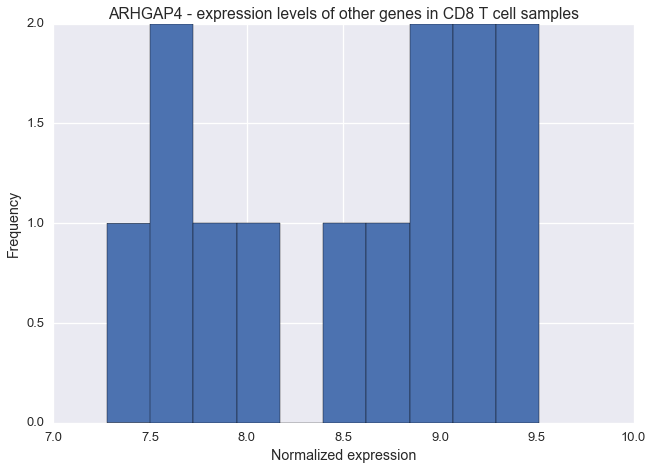

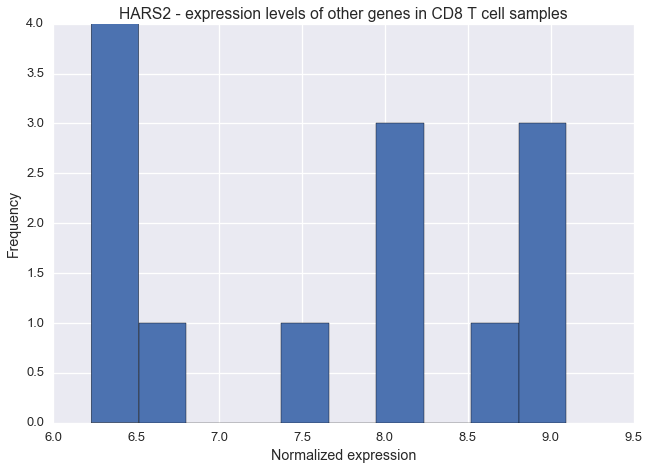

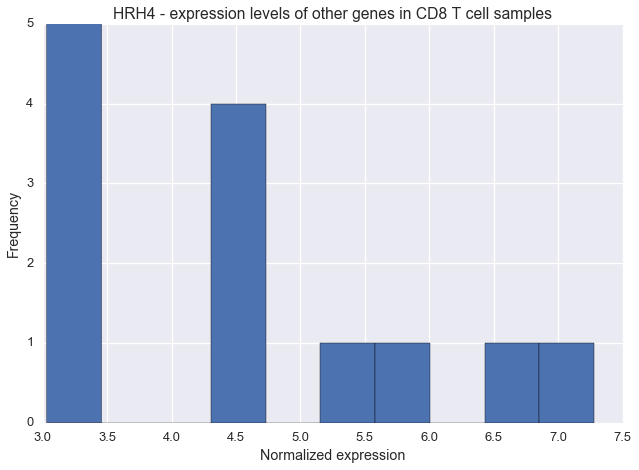

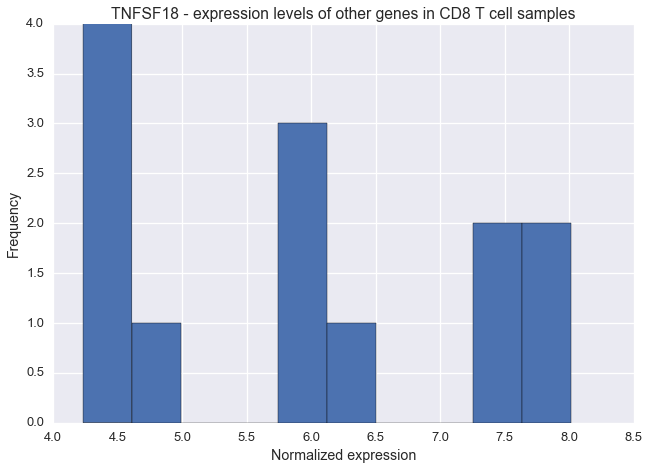

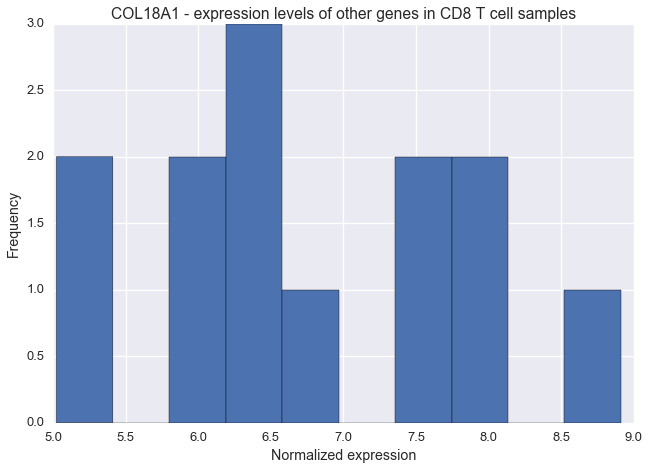

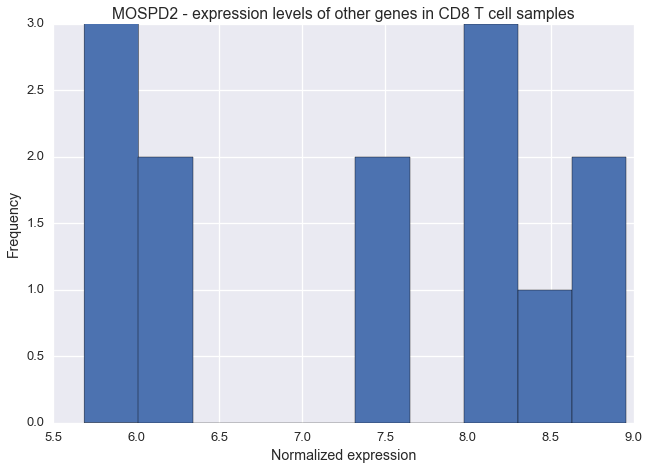

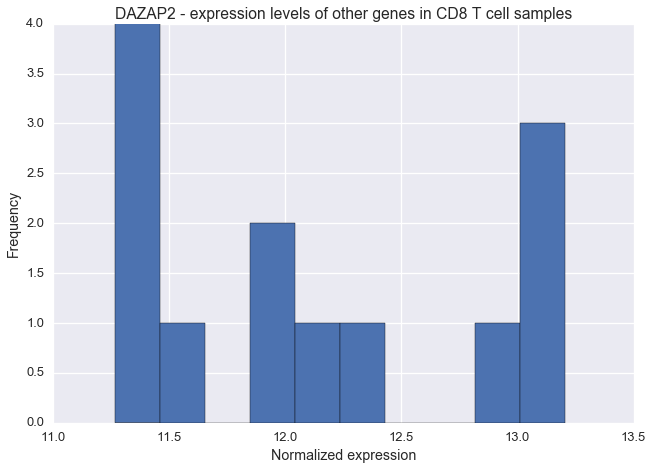

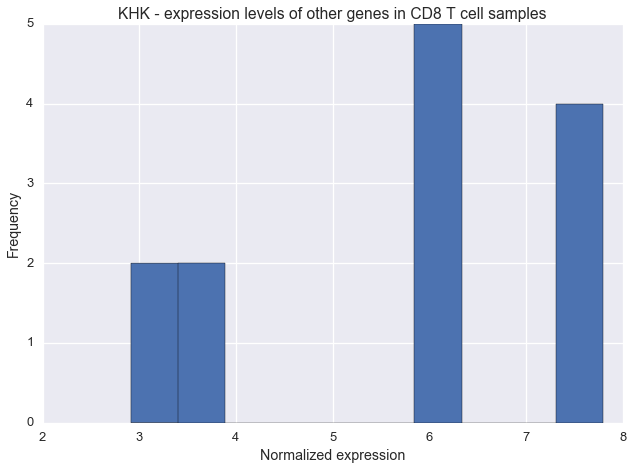

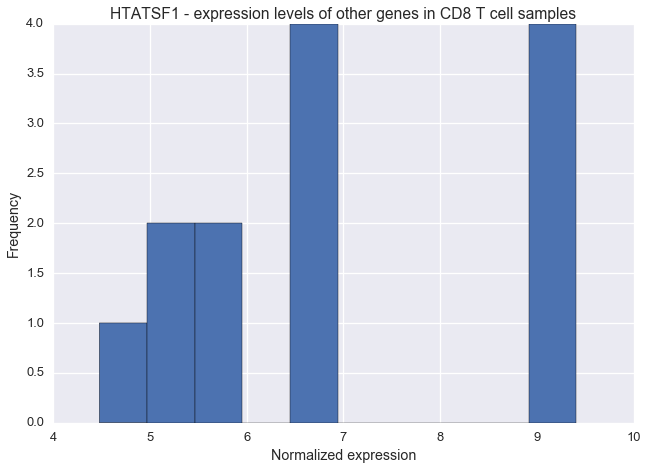

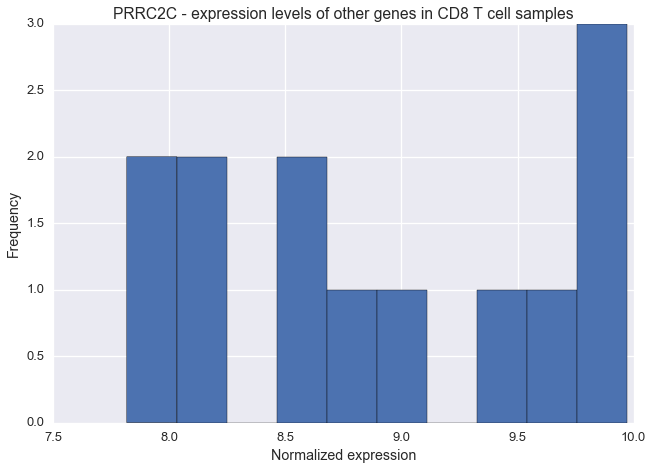

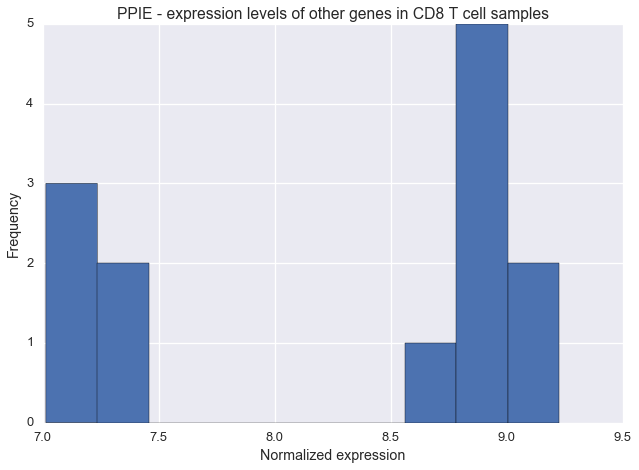

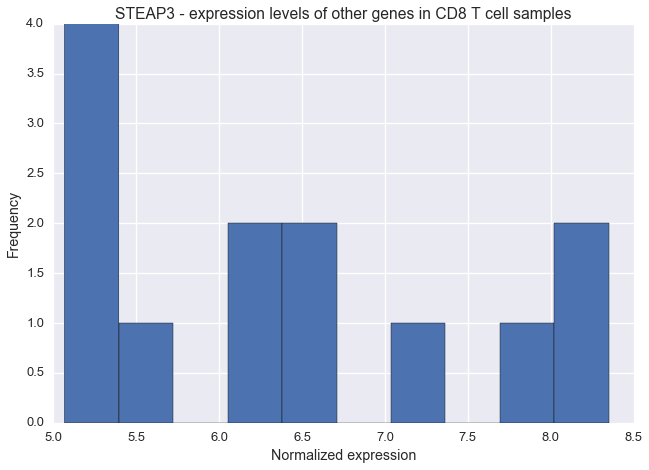

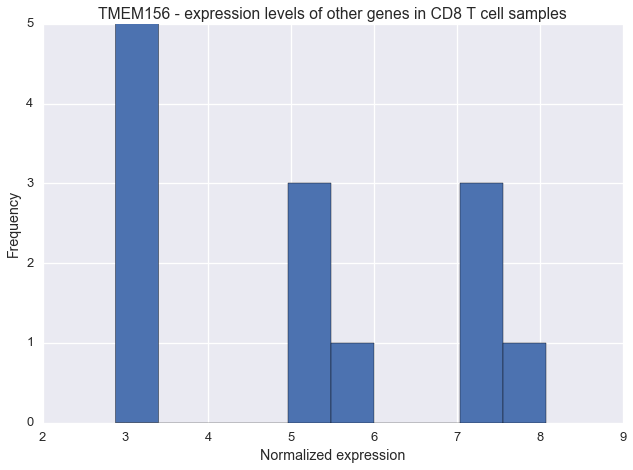

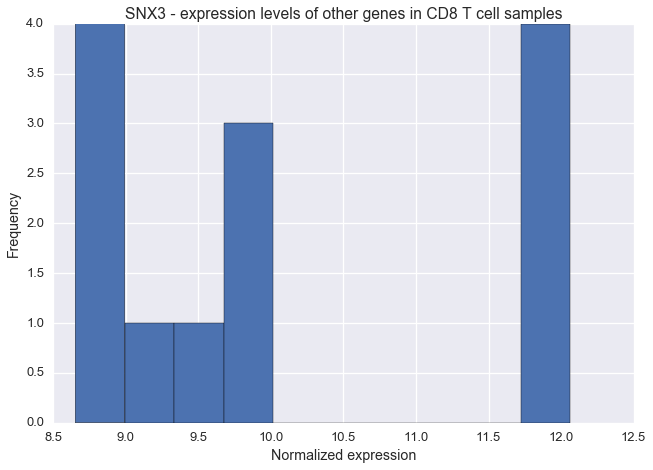

In [70]:
for _,row in non_matching.sample(20)[T_cell_cols].iterrows():
    fig = plt.figure()
    row.hist(ax=fig.gca())
    plt.title(row.name + ' - expression levels of other genes in CD8 T cell samples')
    plt.xlabel('Normalized expression')
    plt.ylabel('Frequency')